<a href="https://colab.research.google.com/github/MiguelToro-code/Challenge-Alura-Store-Latam/blob/main/ChallengeAluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importación de datos**



In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda1 = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda1.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


In [2]:
# cambio de tipo de campo Fecha de Compra de string a datetime

tienda1['Fecha de Compra'] = pd.to_datetime(tienda1['Fecha de Compra'], format='%d/%m/%Y')
tienda2['Fecha de Compra'] = pd.to_datetime(tienda2['Fecha de Compra'], format='%d/%m/%Y')
tienda3['Fecha de Compra'] = pd.to_datetime(tienda3['Fecha de Compra'], format='%d/%m/%Y')
tienda4['Fecha de Compra'] = pd.to_datetime(tienda4['Fecha de Compra'], format='%d/%m/%Y')


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

#**1. Análisis de facturación**

#### En este primer análisis, debes calcular el ingreso total de cada tienda.
Sumando los valores de la columna Precio de cada conjunto de datos de la tienda para estimar los ingresos.

## Cálculo de facturación total por cada tienda

In [4]:
# función para calcular la facturación de una tienda (df) recibida como parámetro

def calcular_facturacion_total(df):
    facturacion_total = df['Precio'].sum()
    return facturacion_total

In [5]:
facturacion_total_tienda1 = calcular_facturacion_total(tienda1)
facturacion_total_tienda2 = calcular_facturacion_total(tienda2)
facturacion_total_tienda3 = calcular_facturacion_total(tienda3)
facturacion_total_tienda4 = calcular_facturacion_total(tienda4)


In [6]:
facturacion_x_tienda = {
    'Tienda 1': facturacion_total_tienda1,
    'Tienda 2': facturacion_total_tienda2,
    'Tienda 3': facturacion_total_tienda3,
    'Tienda 4': facturacion_total_tienda4
    }

In [7]:
# Conversión a DataFrame

df = pd.DataFrame(list(facturacion_x_tienda.items()), columns=['Tienda', 'Facturación'])
df_facturacion_total = df.sort_values(by='Facturación', ascending=False)
df['Facturación'] = round(df['Facturación']/1000000,1) # conversión a millones para facilitar lectura de datos

### Gráfico Facturación Total por Tienda

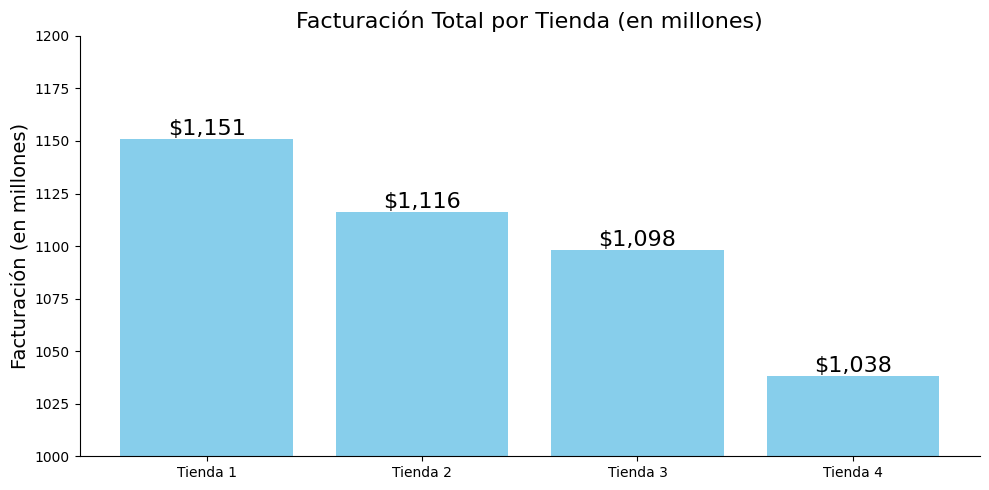

In [8]:
plt.figure(figsize=(10, 5))  # Tamaño del gráfico
plt.bar(df['Tienda'], df['Facturación'], color='skyblue')

# Personalización
plt.title('Facturación Total por Tienda (en millones)', fontsize=16)
plt.xlabel('')
plt.ylabel('Facturación (en millones)', fontsize=14)

# Limitar el eje Y entre 1000 y 1200 para facilitar comparación de cantidades
plt.ylim(1000, 1200)

# Añadir etiquetas con los valores
for i, valor in enumerate(df['Facturación']):
    plt.text(i, valor, f"${valor:,.0f}", ha='center', va='bottom', fontsize=16)
sns.despine()
plt.tight_layout()
plt.savefig('barplot_facturacion_x_tienda.png',bbox_inches='tight', dpi=300)
plt.show()

# **2. Ventas por categoría**

#### En este debes calcular la cantidad de productos vendidos por categoría en cada tienda.
#### La idea es agrupar los datos por categoría y contar el número de ventas de cada tipo,
mostrando las categorías más populares de cada tienda.

## Cálculo de los productos vendidos por categoría en cada tienda

In [9]:
# función para calcular la cantidad de ventas por categoría en una tienda
# muestra un gráfico de barras con esas cantidades
# (Un gráfico de pie no es apropiado cuando hay muchas categorías, en este caso 8)

def calcular_productos_vendidos_por_categoria(df: pd.DataFrame, tienda: str, paleta):
    productos_vendidos_x_categoria = df.groupby('Categoría del Producto')['Categoría del Producto'].count().sort_values(ascending=False)
    df_prod_vendidos_x_categoria = pd.DataFrame(list(productos_vendidos_x_categoria.items()),
                                                   columns=['Categoría', 'Cantidad de Ventas'])
    titulo = str(f'Cantidad de Ventas por Categoría en {tienda}')

    grafico = sns.barplot(data=df_prod_vendidos_x_categoria,
                          x='Cantidad de Ventas',
                          y='Categoría',
                          hue='Categoría',
                          orient='h',
                          palette=paleta)

    grafico.set(title=titulo, ylabel='', xlabel='Cantidad de ventas')

    for i,j in enumerate(df_prod_vendidos_x_categoria['Cantidad de Ventas']):
      grafico.text(j+20, i, str(j), ha='left', va='center', fontsize=12)
    sns.despine()
    plt.grid=(False)
    plt.savefig(f'barplot_productos_vendidos_por_categoria_{tienda}.png',bbox_inches='tight', dpi=300)
    plt.show()


### Gráficos de productos vendidos por categoría

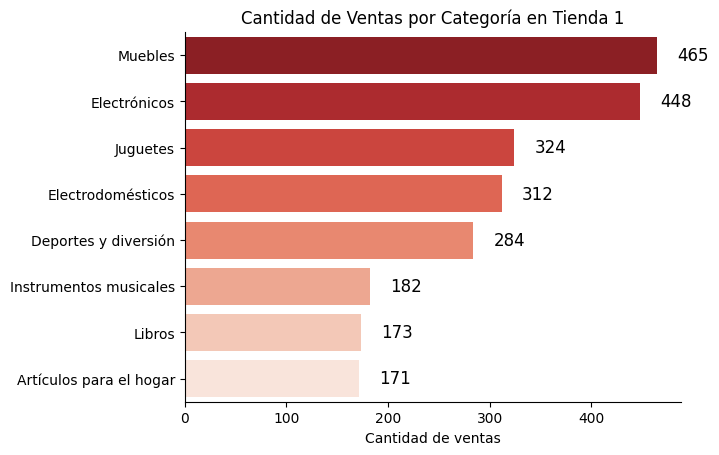

In [10]:
calcular_productos_vendidos_por_categoria(tienda1, 'Tienda 1','Reds_r')

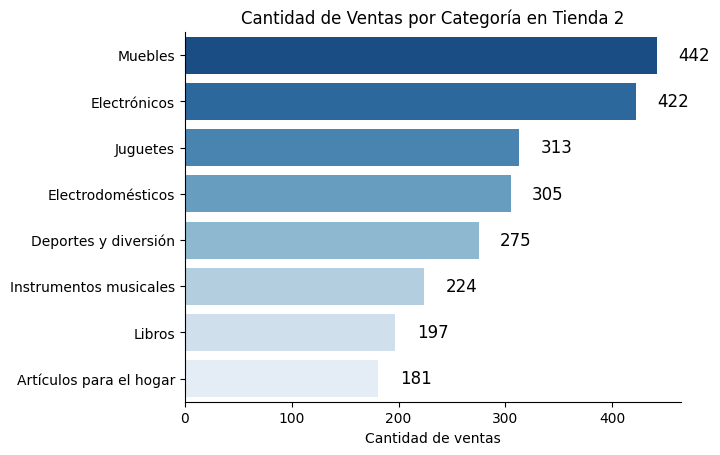

In [11]:
calcular_productos_vendidos_por_categoria(tienda2, 'Tienda 2','Blues_r')


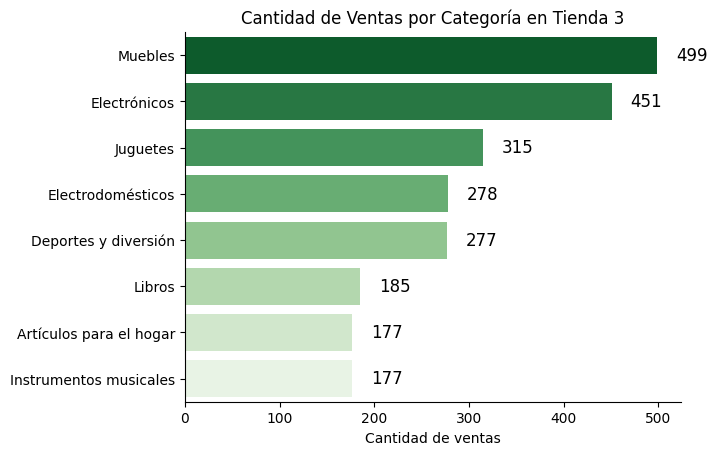

In [12]:
calcular_productos_vendidos_por_categoria(tienda3, 'Tienda 3','Greens_r')

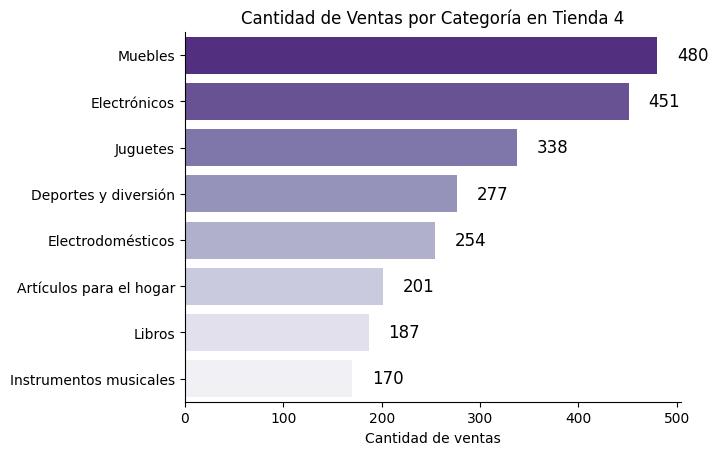

In [13]:
calcular_productos_vendidos_por_categoria(tienda4, 'Tienda 4', 'Purples_r')

## Cálculo de la facturación por categoría en cada tienda

In [14]:
# función para calcular la facturación por categoría en una tienda
# muestra un gráfico de barras horizontales con esas cantidades

def calcular_facturacion_por_categoria(df: pd.DataFrame, tienda: str, paleta):
    fact_x_categoria = df.groupby('Categoría del Producto')['Precio'].sum().sort_values(ascending=False)

    df_fact_x_categoria = pd.DataFrame(list(fact_x_categoria.items()), columns=['Categoría', 'Facturación'])

    df_fact_x_categoria['Facturación'] = round(df_fact_x_categoria['Facturación']/1000000,1) # se convierten cantidades a millones para facilitar lectura

    titulo = str(f'Facturación por Categoría en {tienda} (en millones)')
    grafico = sns.barplot(data=df_fact_x_categoria,
                          x='Facturación',
                          y='Categoría',
                          hue='Categoría',
                          palette=paleta,
                          orient='h')
    grafico.set(title=titulo, ylabel='', xlabel='Facturación (en millones)')
    sns.despine()
    for i,j in enumerate(df_fact_x_categoria['Facturación']):
      grafico.text(j+20, i, str(j), ha='left', va='center', fontsize=12)
    plt.savefig(f'barplot_facturacion_por_categoria_{tienda}.png',bbox_inches='tight', dpi=300)
    plt.show()
#    grafico

### Gráficos de facturación por categoría por tiendas

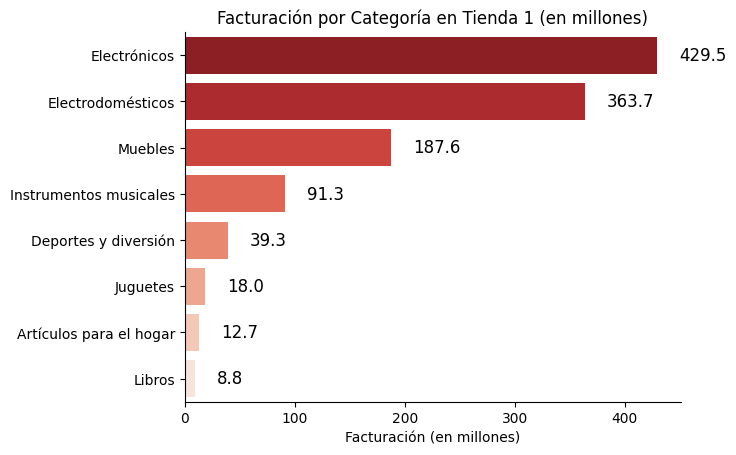

In [15]:
calcular_facturacion_por_categoria(tienda1, 'Tienda 1','Reds_r')

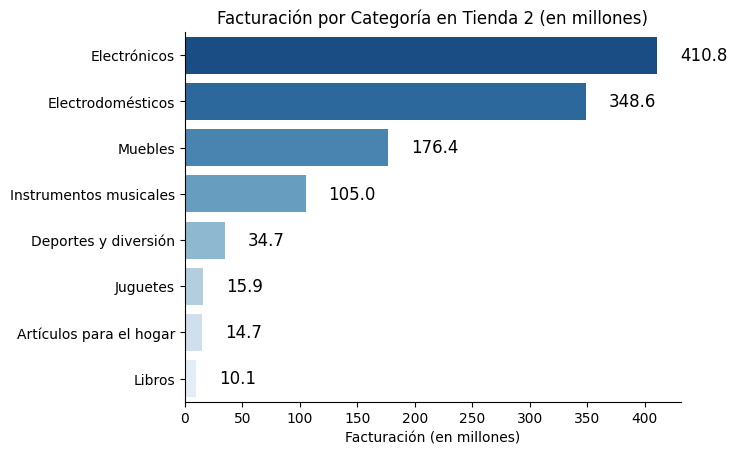

In [16]:
calcular_facturacion_por_categoria(tienda2, 'Tienda 2','Blues_r')

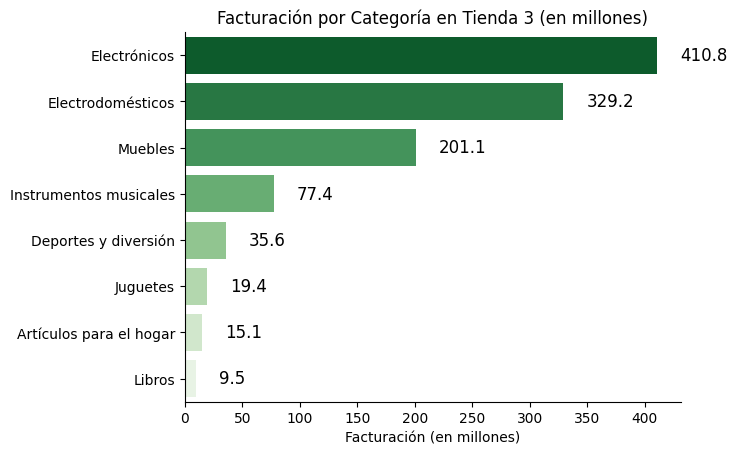

In [17]:
calcular_facturacion_por_categoria(tienda3, 'Tienda 3','Greens_r')

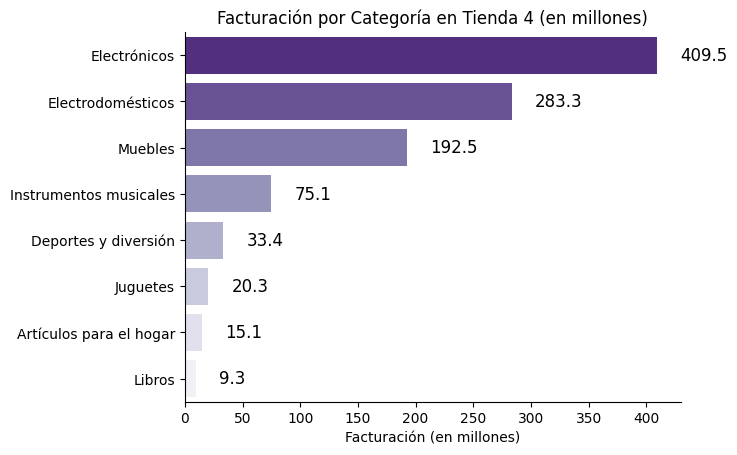

In [18]:
calcular_facturacion_por_categoria(tienda4, 'Tienda 4', 'Purples_r')

# **3. Calificación promedio de la tienda**

#### En este paso, debes calcular las calificaciones promedio de los clientes para cada tienda.
#### El objetivo es conocer la satisfacción del cliente con los productos vendidos.


## Cálculo de calificaciones promedio por tienda

In [19]:
# función para calcular la calificación promedio de una tienda

def calcular_calificacion_promedio(df: pd.DataFrame):
    calificacion_promedio = df['Calificación'].mean()
    return calificacion_promedio


In [20]:
calificacion_tienda1 = calcular_calificacion_promedio(tienda1)
calificacion_tienda2 = calcular_calificacion_promedio(tienda2)
calificacion_tienda3 = calcular_calificacion_promedio(tienda3)
calificacion_tienda4 = calcular_calificacion_promedio(tienda4)

calificacion_x_tienda = {
    "Tienda": ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"],
    "Calificación": [calificacion_tienda1,calificacion_tienda2,calificacion_tienda3,calificacion_tienda4]
    }

df = pd.DataFrame(calificacion_x_tienda)

# Ordenar el DataFrame por Calificación (descendente)
df = df.sort_values("Calificación", ascending=False)

### Gráfico de calificación promedio de tiendas

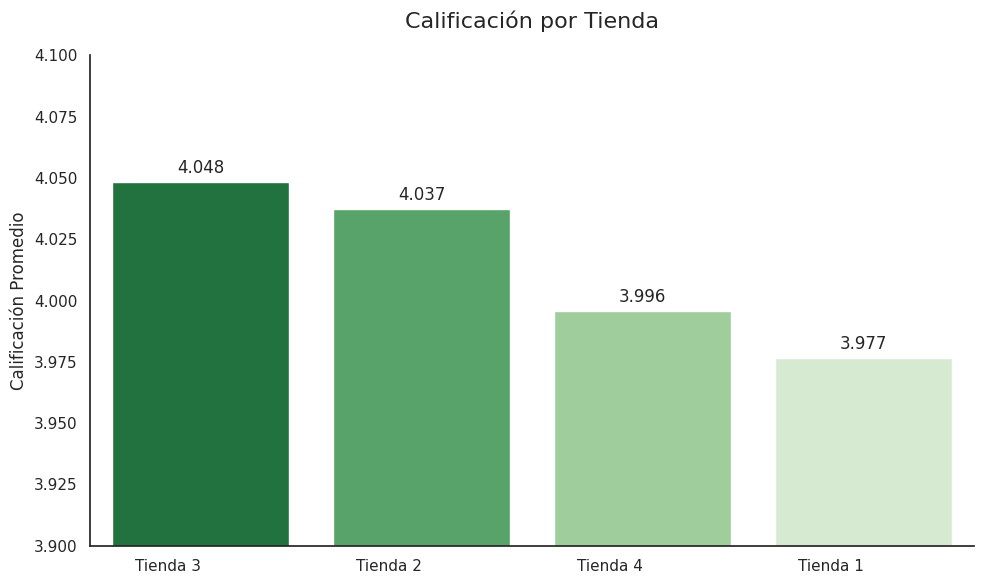

In [21]:
# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
sns.set_theme(style="white")

ax = sns.barplot(
    data=df,
    x="Tienda",
    y="Calificación",
    hue="Tienda",
    palette="Greens_r",
    order=df["Tienda"]
)

# Personalización
plt.title("Calificación por Tienda", fontsize=16, pad=20)
plt.xlabel("")
plt.ylabel("Calificación Promedio", fontsize=12)

# Limitar el eje Y entre 3.9 y 4.1 para una mejor diferenciación de los valores
plt.ylim(3.9, 4.1)

# Añadir los valores encima de cada barra
for p in ax.patches:
    ax.annotate(
        f"{p.get_height():.3f}",  # Formato a 3 decimales
        (p.get_x() + p.get_width() / 2.0, p.get_height()),
        ha="center",
        va="center",
        xytext=(0, 10),
        textcoords="offset points"
    )

plt.xticks(ha="right")
plt.grid=(False)
sns.despine()
plt.savefig('barplot_calificacion_x_tienda.png',bbox_inches='tight', dpi=300)
plt.tight_layout()
plt.show()

# **4. Productos más y menos vendidos por tienda**

#### En este paso, debes identificar qué productos fueron los más vendidos y los menos vendidos en cada tienda. Visualiza los resultados para que quede claro qué productos destacaron en ventas en cada tienda.

## Cálculo de productos más y menos vendidos por tienda

In [22]:
# función para calcular las ventas por producto,
# ordenándolos en forma descendente para obtener en el primer lugar el más vendido
# y en el último lugar el menos vendido

datos_tiendas = []

def calcular_ventas_por_producto(df: pd.DataFrame, tienda: str):
    ventas_x_producto = df.groupby('Producto')['Producto'].count().sort_values(ascending=False)
    df_ventas_x_producto = pd.DataFrame(list(ventas_x_producto.items()), columns=['Producto', 'Cantidad de Ventas'])
    mas_vendido = df_ventas_x_producto['Producto'][0]
    menos_vendido = df_ventas_x_producto['Producto'][len(df_ventas_x_producto) -1]

    cant_mas_vendida = df_ventas_x_producto['Cantidad de Ventas'].max()
    cant_menos_vendida = df_ventas_x_producto['Cantidad de Ventas'].min()

    datos_tiendas.append({"Tienda" :tienda,
                         "Prod más vendido" :mas_vendido,
                         "Cantidad más vendida":cant_mas_vendida,
                         "Prod menos vendido":menos_vendido,
                         "Cantidad menos vendida":cant_menos_vendida})


In [23]:
calcular_ventas_por_producto(tienda1, 'Tienda 1')
calcular_ventas_por_producto(tienda2, 'Tienda 2')
calcular_ventas_por_producto(tienda3, 'Tienda 3')
calcular_ventas_por_producto(tienda4, 'Tienda 4')

In [24]:
df = pd.DataFrame(datos_tiendas)

In [25]:
# Preparar datos para más vendidos
df_mas_vendido = df[["Tienda", "Prod más vendido", "Cantidad más vendida"]].rename(
    columns={"Prod más vendido": "Producto", "Cantidad más vendida": "Cantidad"}
)
df_mas_vendido["Tipo"] = "Más vendido"

# Preparar datos para menos vendidos
df_menos_vendido = df[["Tienda", "Prod menos vendido", "Cantidad menos vendida"]].rename(
    columns={"Prod menos vendido": "Producto", "Cantidad menos vendida": "Cantidad"}
)
df_menos_vendido["Tipo"] = "Menos vendido"

df_grafico = pd.concat([df_mas_vendido, df_menos_vendido])

### Gráfico de productos más y menos vendidos por tienda

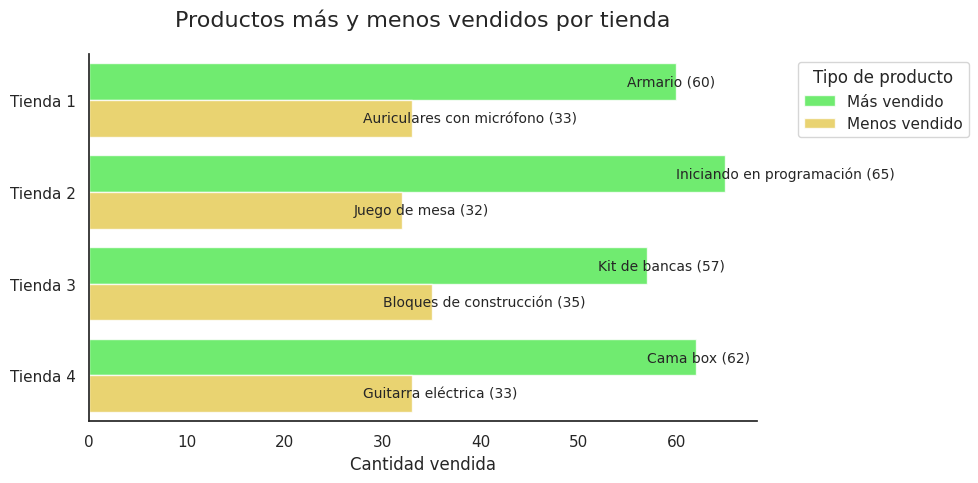

In [26]:
plt.figure(figsize=(10, 5))
sns.set_theme(style="white")

# Gráfico de barras horizontales
barplot = sns.barplot(
    data=df_grafico,
    y="Tienda",
    x="Cantidad",
    hue="Tipo",
    palette={"Más vendido": "#33ff33", "Menos vendido": "#fdd835"},
    alpha=0.8,
    orient="h"
)

# Añadir etiquetas con nombres y cantidades
for bar, (_, row) in zip(barplot.patches, df_grafico.iterrows()):
    width = bar.get_width()
    label_text = f"{row['Producto']} ({row['Cantidad']})"
    x = width - 5 if width > 10 else width + 1
    y = bar.get_y() + bar.get_height() / 2
    barplot.text(x, y, label_text, ha="left" if width > 10 else "right", va="center", fontsize=10)

# Personalización
plt.title("Productos más y menos vendidos por tienda", fontsize=16, pad=20)
plt.xlabel("Cantidad vendida", fontsize=12)
plt.ylabel("")
plt.legend(title="Tipo de producto", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
sns.despine()
plt.savefig('barplot_productos_mas_menos_vendidos_x_tienda.png',bbox_inches='tight', dpi=300)
plt.show()

# **5. Costo Promedio de Envío  por tienda**

#### En este paso, debes calcular el costo de envío promedio para cada tienda. El objetivo es comprender cuánto se gasta, en promedio, en el envío de cada tienda.

## **Cálculo de Costo Promedio de Envío  por tienda**

In [27]:
# Función para calcular el costo promedio de los envíos de una tienda

def calcular_costo_envio_promedio(df: pd.DataFrame):
    costo_promedio_envios = df['Costo de envío'].mean()
    return costo_promedio_envios

In [28]:
envios_tienda1 = calcular_costo_envio_promedio(tienda1)
envios_tienda2 = calcular_costo_envio_promedio(tienda2)
envios_tienda3 = calcular_costo_envio_promedio(tienda3)
envios_tienda4 = calcular_costo_envio_promedio(tienda4)

envios_x_tienda = {
    'Tienda 1': envios_tienda1,
    'Tienda 2': envios_tienda2,
    'Tienda 3': envios_tienda3,
    'Tienda 4': envios_tienda4
    }

# Convertir el diccionario a un DataFrame
df_envios = pd.DataFrame(list(envios_x_tienda.items()), columns=['Tienda', 'Costo de envío promedio'])
df_envios = df_envios.sort_values(by='Costo de envío promedio', ascending=False)

### **Gráfico de Costor Promedio de Envío por tienda**

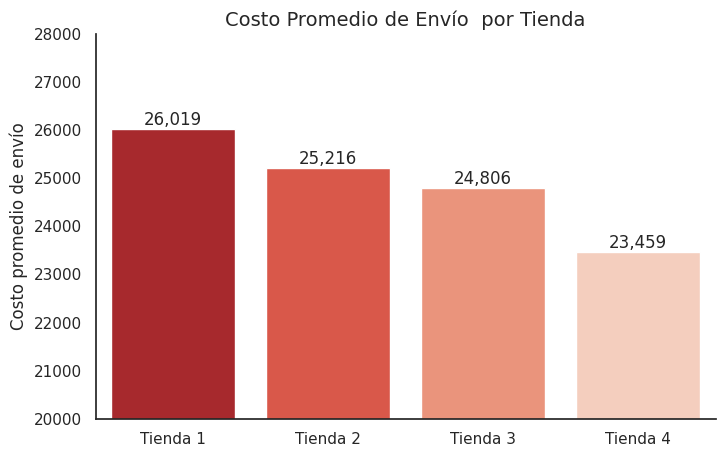

In [29]:
# Configurar el estilo
sns.set_theme(style="white")

# Crear el gráfico de barras
plt.figure(figsize=(8, 5))  # Tamaño del gráfico
barplot = sns.barplot(
    data=df_envios,
    x='Tienda',
    y='Costo de envío promedio',
    hue='Tienda',
    palette="Reds_r"
)

# Personalizar el gráfico
plt.title("Costo Promedio de Envío  por Tienda", fontsize=14)
plt.xlabel("")
plt.ylabel("Costo promedio de envío", fontsize=12)

plt.ylim(20000, 28000)  # Mínimo=3.5, Máximo=5.0

for index, row in df_envios.iterrows():
    plt.text(index, row['Costo de envío promedio'], f"{row['Costo de envío promedio']:,.0f}", ha='center', va='bottom')

#plt.grid(False)
sns.despine()
plt.savefig('barplot_costo_promedio_envio_x_tienda.png',bbox_inches='tight', dpi=300)
plt.show()

## **Costo Total de Envío por Tienda**



**Se calcula el costo total de envíos por tienda para revisar su relación con la facturación total.**

In [30]:
# Función para calcular el costo total de los envíos de una tienda

def calcular_costo_total_envios(df: pd.DataFrame):
    costo_total_envios = df['Costo de envío'].sum()
    return costo_total_envios

In [31]:
costo_envios_tienda1 = calcular_costo_total_envios(tienda1)
costo_envios_tienda2 = calcular_costo_total_envios(tienda2)
costo_envios_tienda3 = calcular_costo_total_envios(tienda3)
costo_envios_tienda4 = calcular_costo_total_envios(tienda4)

costo_envios_x_tienda = {
    'Tienda 1': costo_envios_tienda1,
    'Tienda 2': costo_envios_tienda2,
    'Tienda 3': costo_envios_tienda3,
    'Tienda 4': costo_envios_tienda4
    }

# Convertir el diccionario a un DataFrame
df_costo_envios = pd.DataFrame(list(costo_envios_x_tienda.items()), columns=['Tienda', 'Costo total de envíos'])
df_costo_envios = df_costo_envios.sort_values(by='Costo total de envíos', ascending=False)

In [32]:
# agrupación de facturación total y costos de envío en un mismo dataframe

df_consolidado = pd.merge(df_facturacion_total, df_costo_envios, on='Tienda')
df_consolidado['Porcentaje costo'] = df_consolidado['Costo total de envíos']/df_consolidado['Facturación']*100

df_consolidado

,Tienda,Facturación,Costo total de envíos,Porcentaje costo
0,Tienda 1,1.150880e+09,61377900.0,5.333126
1,Tienda 2,1.116344e+09,59485100.0,5.328566
2,Tienda 3,1.098020e+09,58516600.0,5.329286
3,Tienda 4,1.038376e+09,55317400.0,5.327301


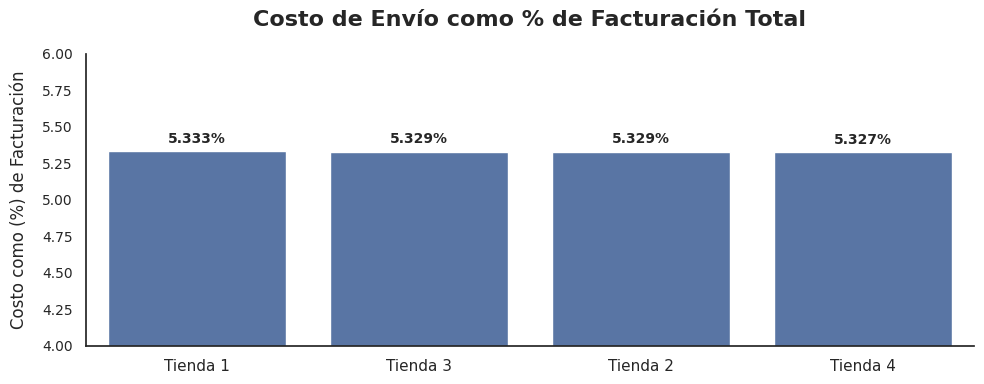

In [33]:
# Configuración del estilo
plt.figure(figsize=(10, 4))

# Ordenar los datos por porcentaje (opcional)
df_sorted = df_consolidado.sort_values('Porcentaje costo', ascending=False)

# Crear el gráfico de barras
ax = sns.barplot(
    data=df_sorted,
    x='Tienda',
    y='Porcentaje costo',
    saturation=0.75
)

# Personalizar las barras
for p in ax.patches:
    ax.annotate(
        f'{p.get_height():.3f}%',  # Mostrar 4 decimales para ver diferencias
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center',
        va='center',
        xytext=(0, 9),
        textcoords='offset points',
        fontsize=10,
        fontweight='bold'
    )
plt.ylim(4, 6)  # Mínimo=3.5, Máximo=5.0
# Añadir títulos y etiquetas
plt.title('Costo de Envío como % de Facturación Total', fontsize=16, pad=20, fontweight='bold')
plt.xlabel('')
plt.ylabel('Costo como (%) de Facturación', fontsize=12, labelpad=10)
plt.xticks(fontsize=11)
plt.yticks(fontsize=10)
sns.despine()
plt.savefig('barplot_costo_envio_como_porct_fact.png',bbox_inches='tight', dpi=300)
# Mostrar el gráfico
plt.tight_layout()
plt.show()

# **6. Análisis de facturación por trimestre**

Puede ser útil para el análisis conocer la evolución de la facturación de las tiendas a través del tiempo

Para esto calcularemos la facturación por trimestre de cada tienda

## Cálculo de la facturación trimestral de cada tienda

In [34]:
# Agrupar la facturación por año y trimestre

tienda1_x_q = tienda1.groupby(tienda1['Fecha de Compra'].dt.to_period('Q'))['Precio'].sum().reset_index()
tienda2_x_q = tienda2.groupby(tienda2['Fecha de Compra'].dt.to_period('Q'))['Precio'].sum().reset_index()
tienda3_x_q = tienda3.groupby(tienda3['Fecha de Compra'].dt.to_period('Q'))['Precio'].sum().reset_index()
tienda4_x_q = tienda4.groupby(tienda4['Fecha de Compra'].dt.to_period('Q'))['Precio'].sum().reset_index()

In [35]:
grouped1 = pd.DataFrame(tienda1_x_q)
grouped2 = pd.DataFrame(tienda2_x_q)
grouped3 = pd.DataFrame(tienda3_x_q)
grouped4 = pd.DataFrame(tienda4_x_q)


In [36]:
# conversión de cantidades a millones para facilitar lectura de datos

grouped1['Precio'] = grouped1['Precio']/1000000
grouped2['Precio'] = grouped2['Precio']/1000000
grouped3['Precio'] = grouped3['Precio']/1000000
grouped4['Precio'] = grouped4['Precio']/1000000

### Gráfico combinado de la facturación trimestral de las cuatro tiendas

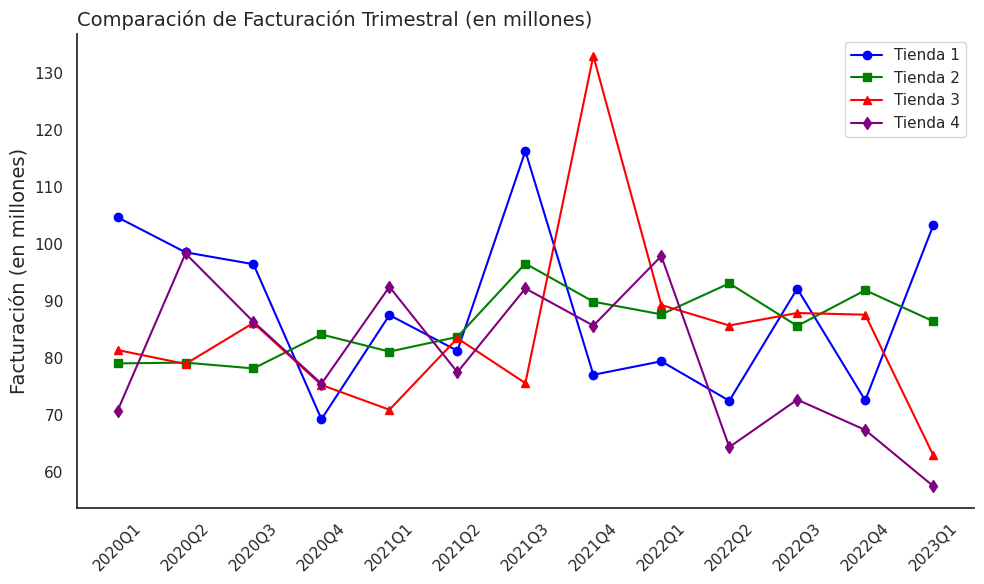

In [37]:
plt.figure(figsize=(10, 6))

# Graficar cada serie
plt.plot(grouped1['Fecha de Compra'].astype(str), grouped1['Precio'], marker='o', label='Tienda 1', color='blue')
plt.plot(grouped2['Fecha de Compra'].astype(str), grouped2['Precio'], marker='s', label='Tienda 2', color='green')
plt.plot(grouped3['Fecha de Compra'].astype(str), grouped3['Precio'], marker='^', label='Tienda 3', color='red')
plt.plot(grouped4['Fecha de Compra'].astype(str), grouped4['Precio'], marker='d', label='Tienda 4', color='purple')

# Personalización
plt.title('Comparación de Facturación Trimestral (en millones)', fontsize=14, loc='left')
plt.xlabel('')
plt.ylabel('Facturación (en millones)', fontsize=14)
plt.xticks(rotation=45)
plt.legend()
sns.despine()
plt.tight_layout()
plt.savefig('lineplot_facturacion_x_trimestre.png',bbox_inches='tight', dpi=300)
plt.show()

In [38]:
from IPython.display import Image, display, Markdown

# **7. INFORME FINAL**

El Presente informe analiza las ventas de 4 tiendas durante el periodo comprendido entre enero de 2020 y marzo de 2023.

Se pretende determinar cúal es la tienda de peor desempeño para aconsejar al propietario su venta.

## **Análisis de la facturación general de cada tienda**

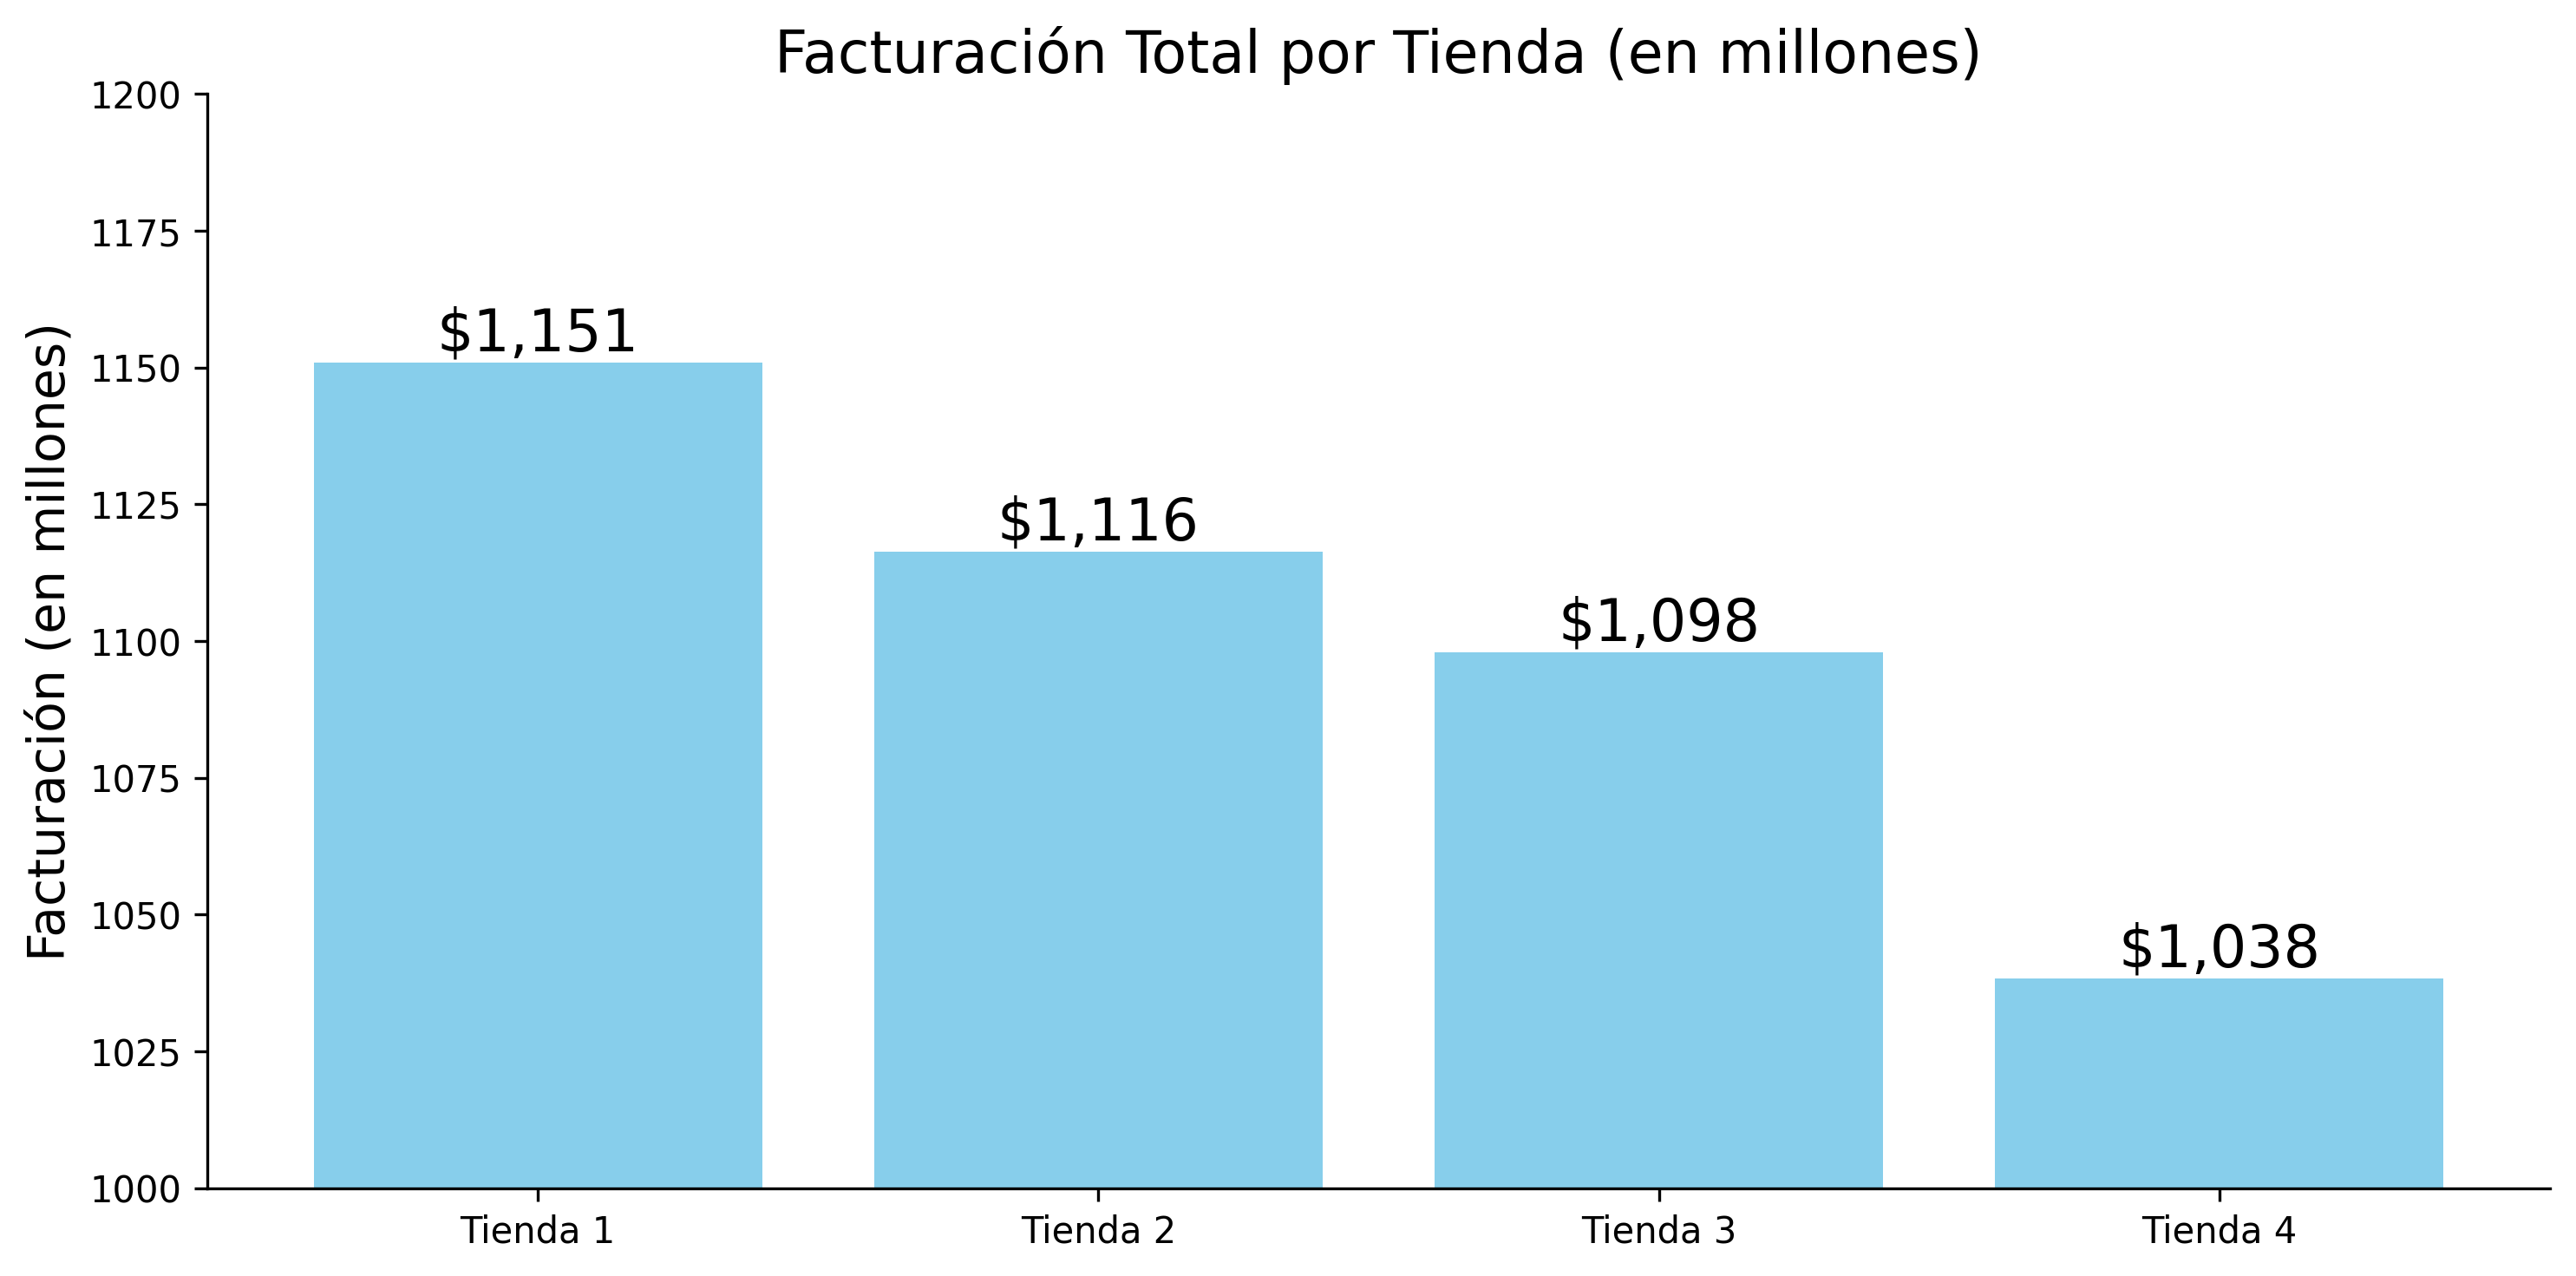

In [39]:
display(Image(filename='/content/barplot_facturacion_x_tienda.png'))

El gráfico comparativo de la facturación total de las tiendas nos muestra que la **Tienda 4** es la que tiene la menor facturación en el periodo estudiado.

La facturación de la **Tienda 4** es un **10% menor** a la facturación de la **Tienda 1** y un **7,5% menor** al promedio de facturación de las otras tres tiendas (1,121.7 millones).

Si asignamos un puntaje a cada tienda según su facturación podríamos tener:

**Tienda 1**: 4 puntos

**Tienda 2**: 3 puntos

**Tienda 3**: 2 puntos

**Tienda 4**: 1 punto

## **Análsis de cantidad de ventas y facturación por categoría**

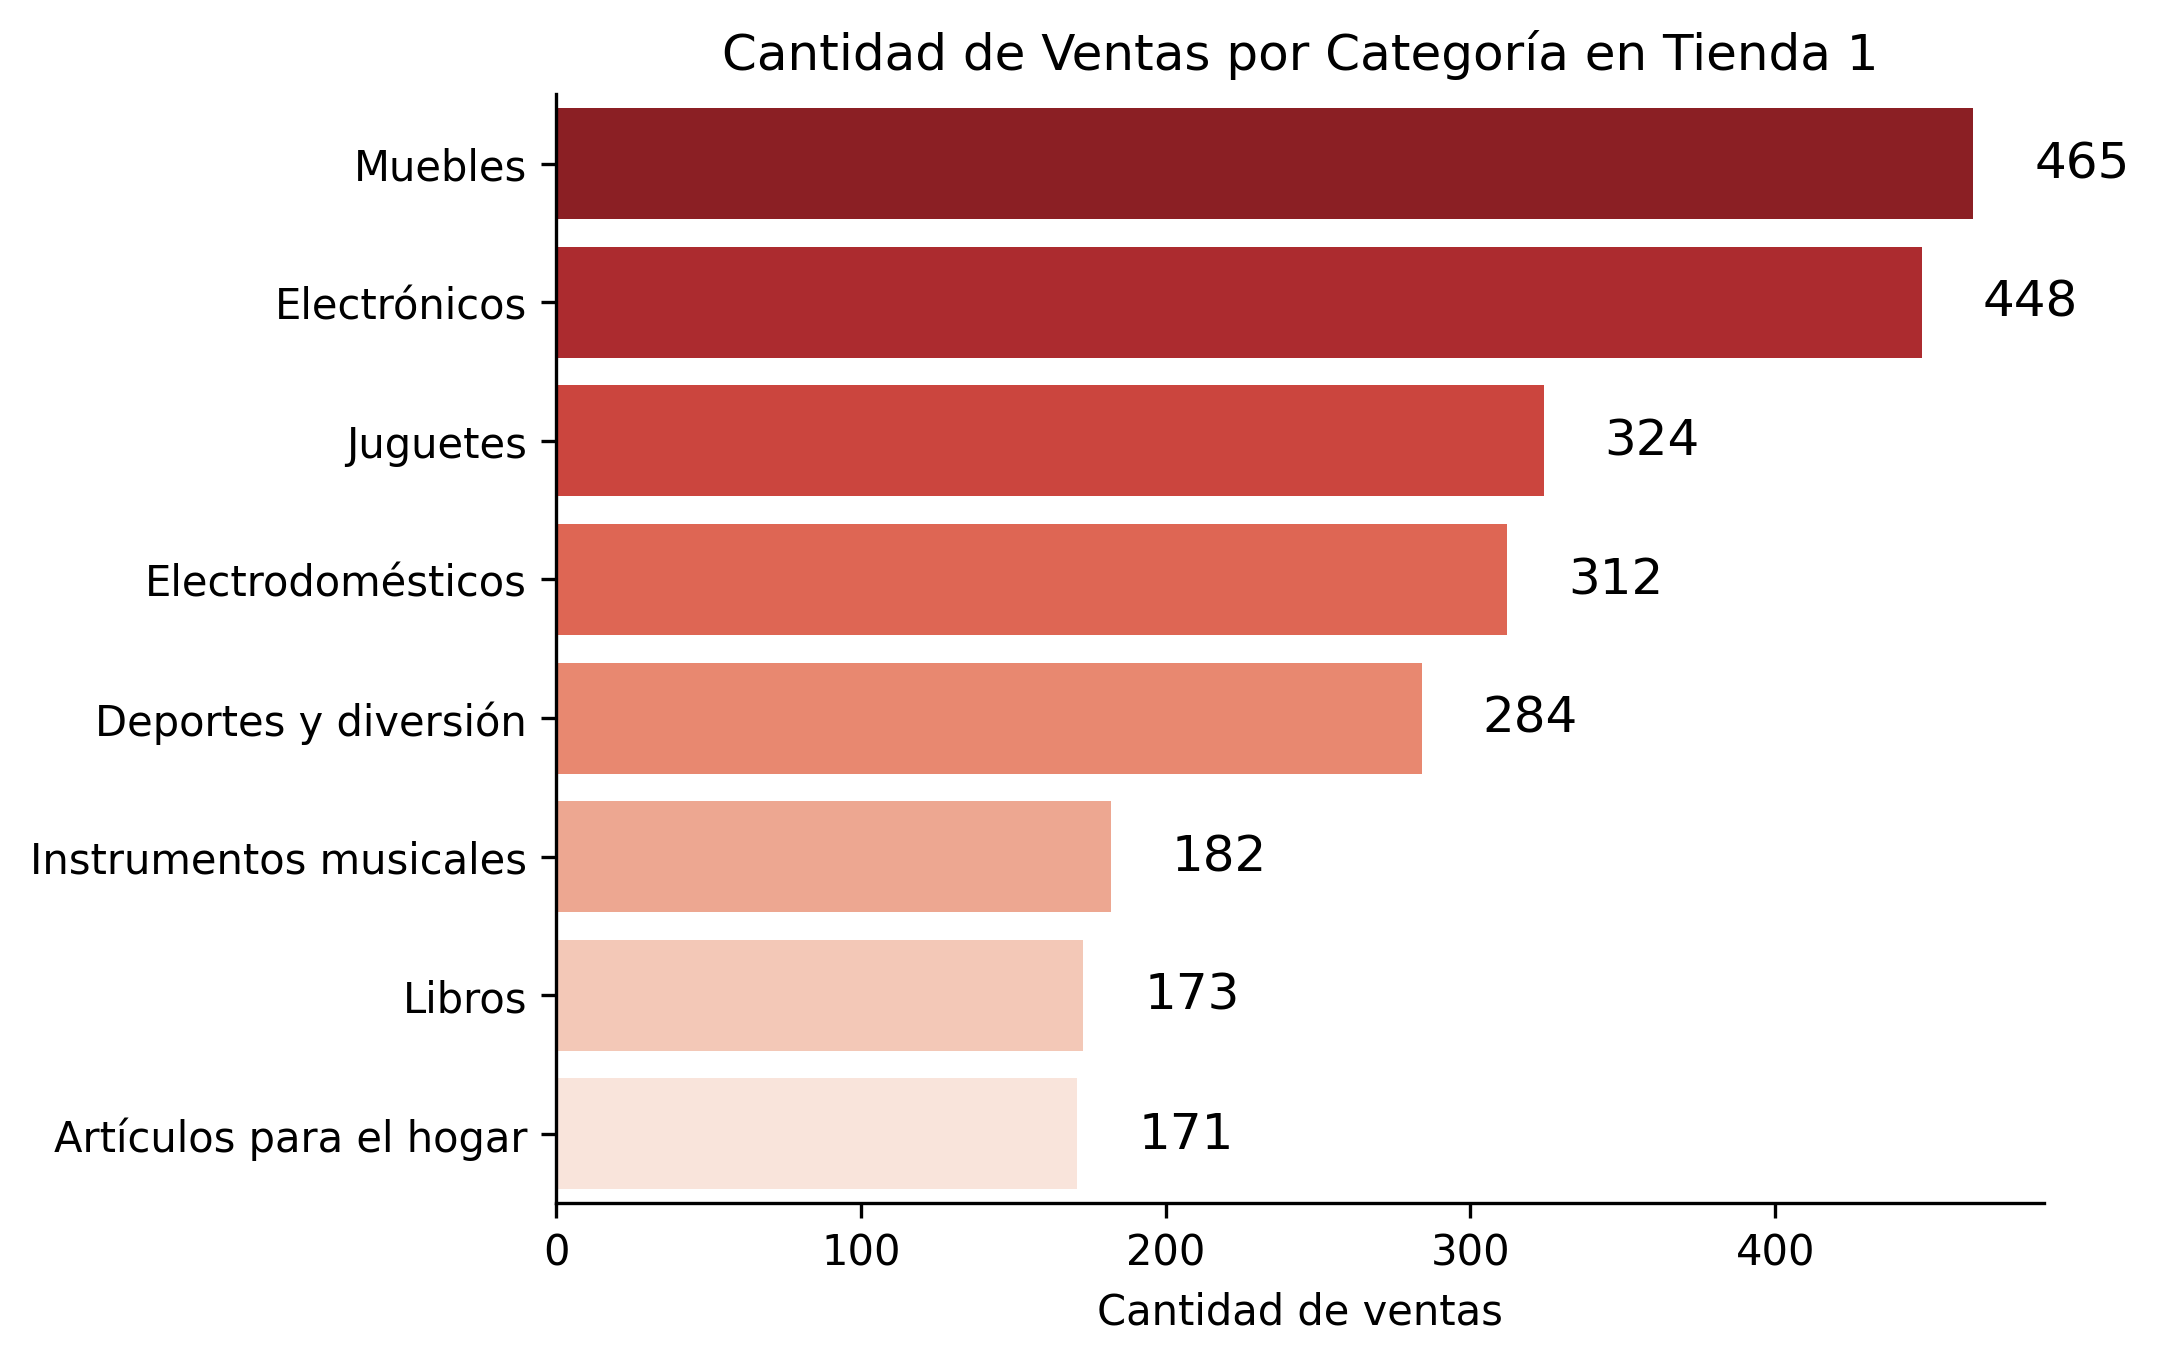

In [40]:
display(Image(filename='/content/barplot_productos_vendidos_por_categoria_Tienda 1.png'))

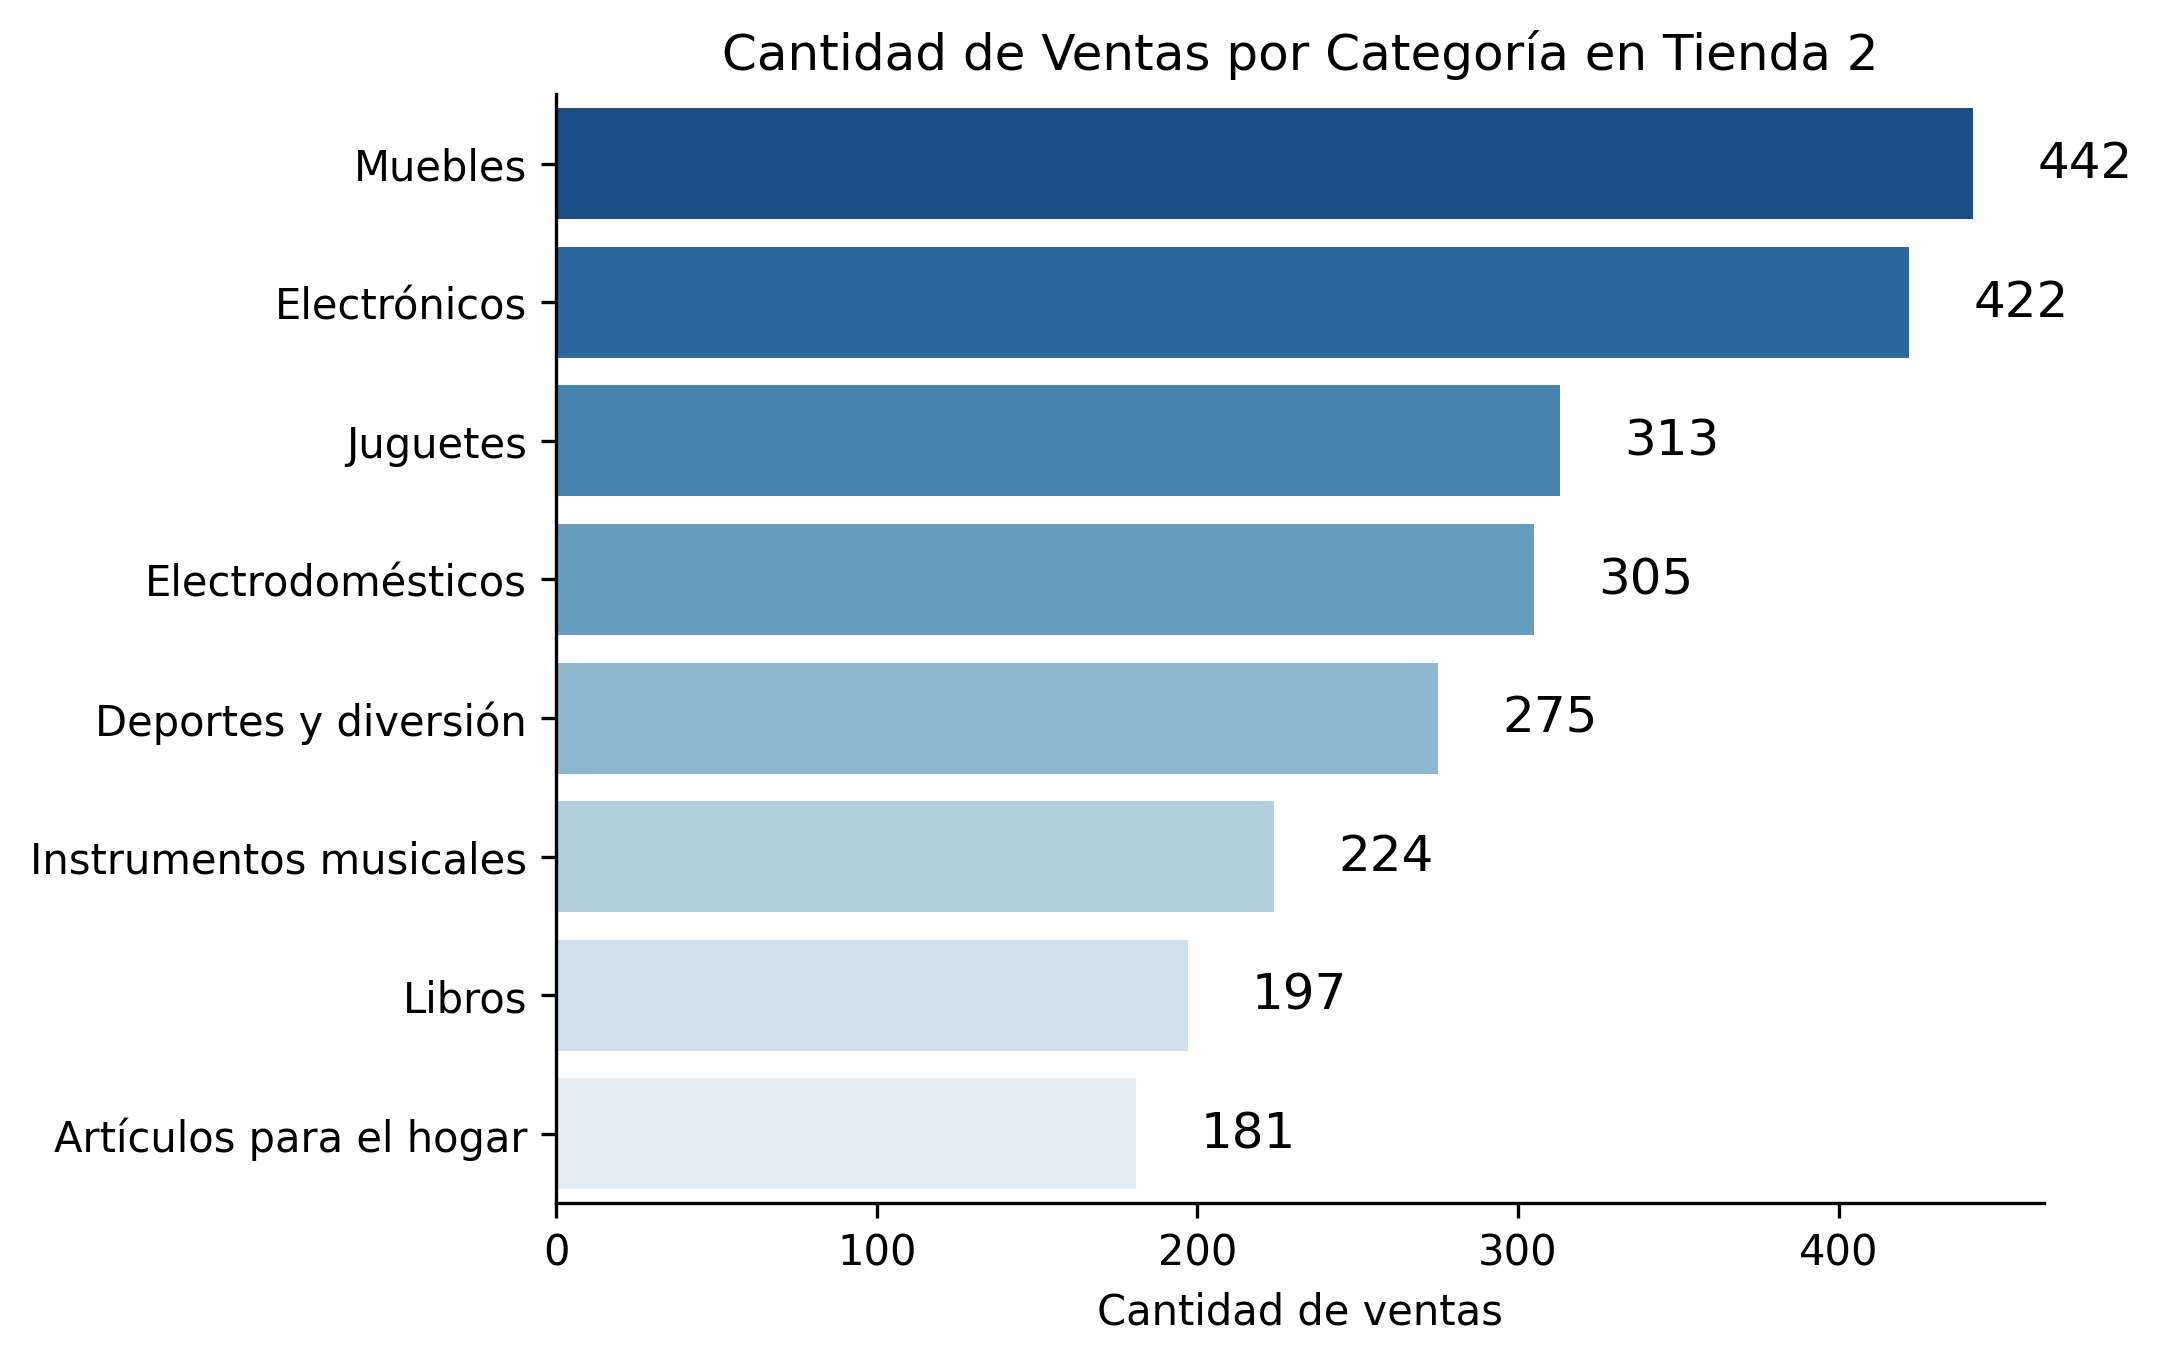

In [41]:
display(Image(filename='/content/barplot_productos_vendidos_por_categoria_Tienda 2.png'))

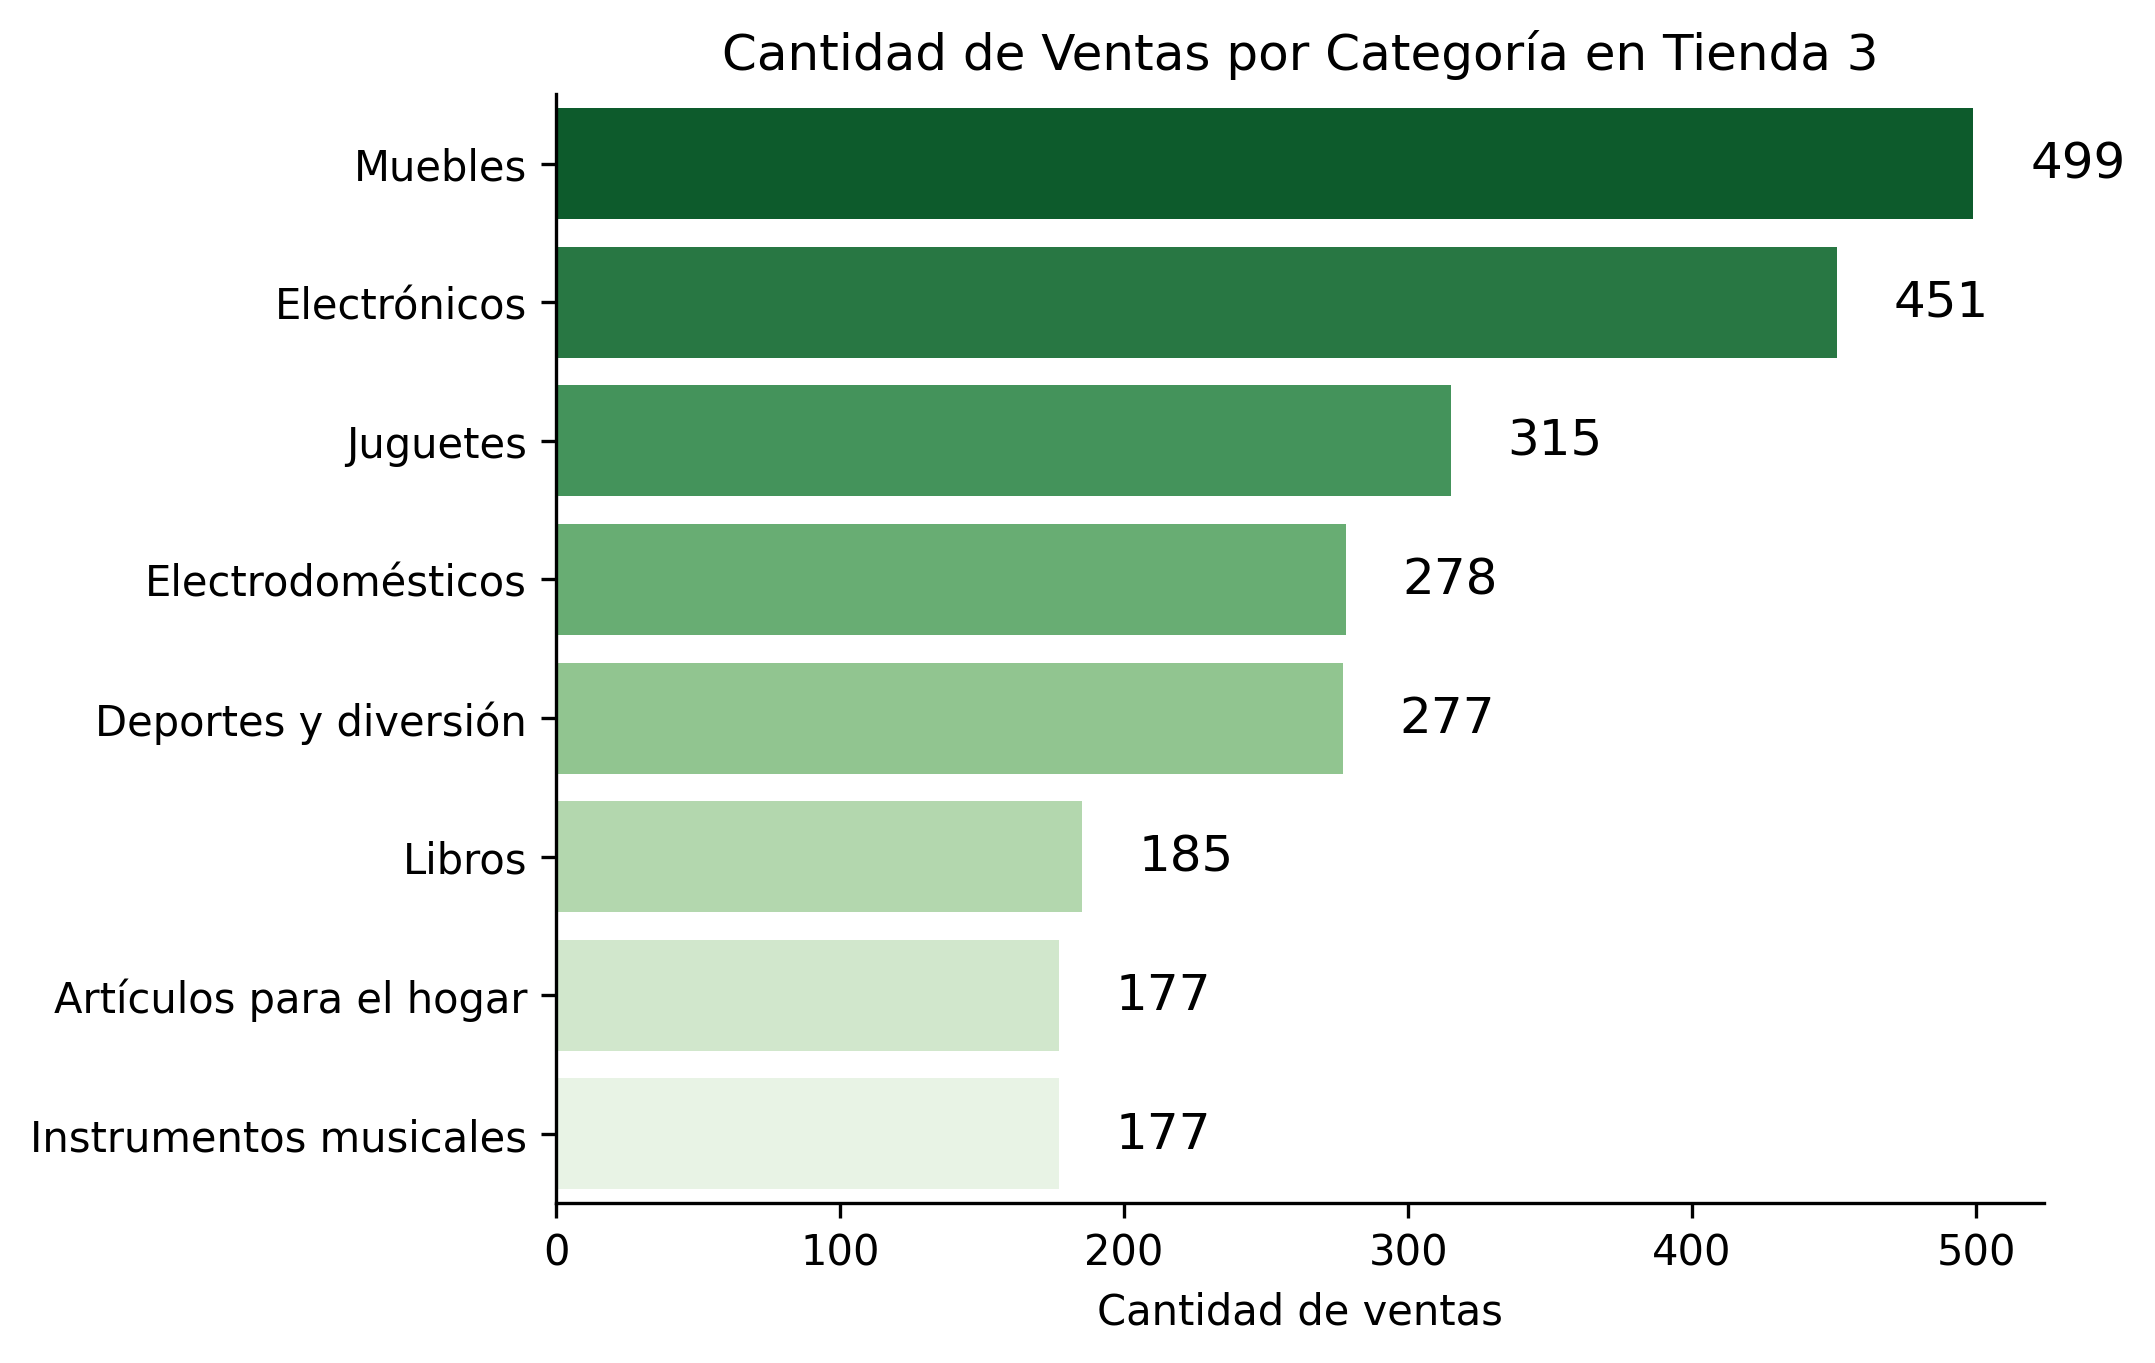

In [42]:
display(Image(filename='/content/barplot_productos_vendidos_por_categoria_Tienda 3.png'))

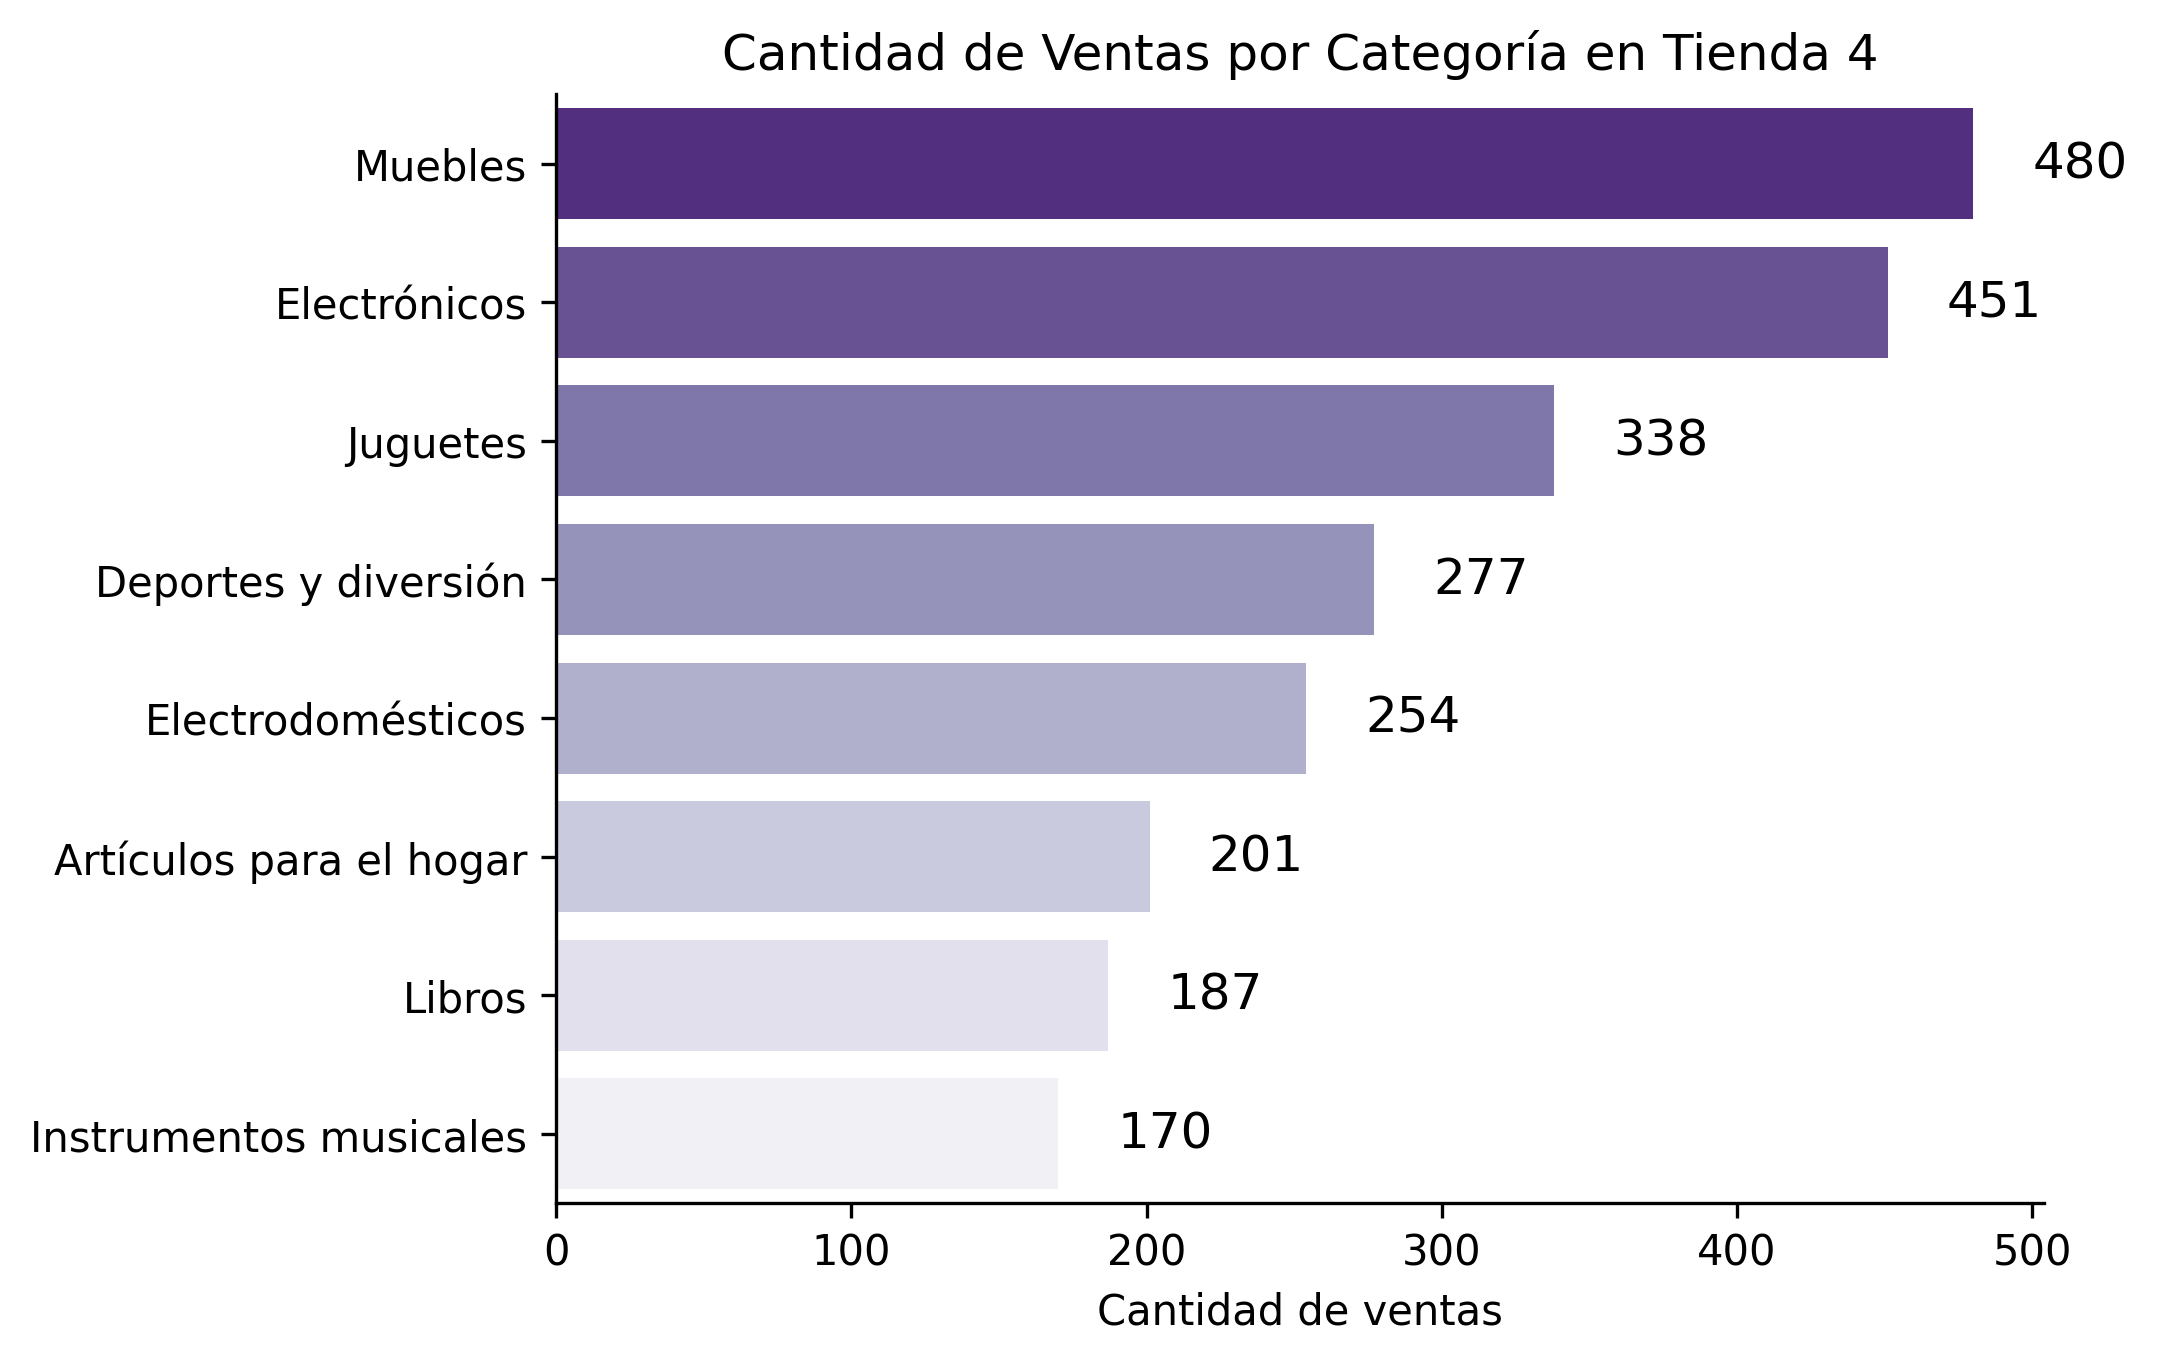

In [43]:
display(Image(filename='/content/barplot_productos_vendidos_por_categoria_Tienda 4.png'))

En los gráficos precedentes se puede ver un patrón similar en las cuatro tiendas.

Las categorías con mayores ventas son: **Muebles, Electrónicos** y **Juguetes**

Con ventas medias están: **Electrodomésticos** y **Deportes y diversión**

Con ventas menores están: **Artículos para el hogar, Libros e Instrumentos musicales**



**De lo anterior se puede concluir que no hay mayor diferencia de las ventas por categoría entre las cuatro tiendas**



**A continuación se presentan los gráficos correspondientes a la *Facturación por Categoría*, para analizar si en esos datos se aprecia alguna diferencia perceptible**

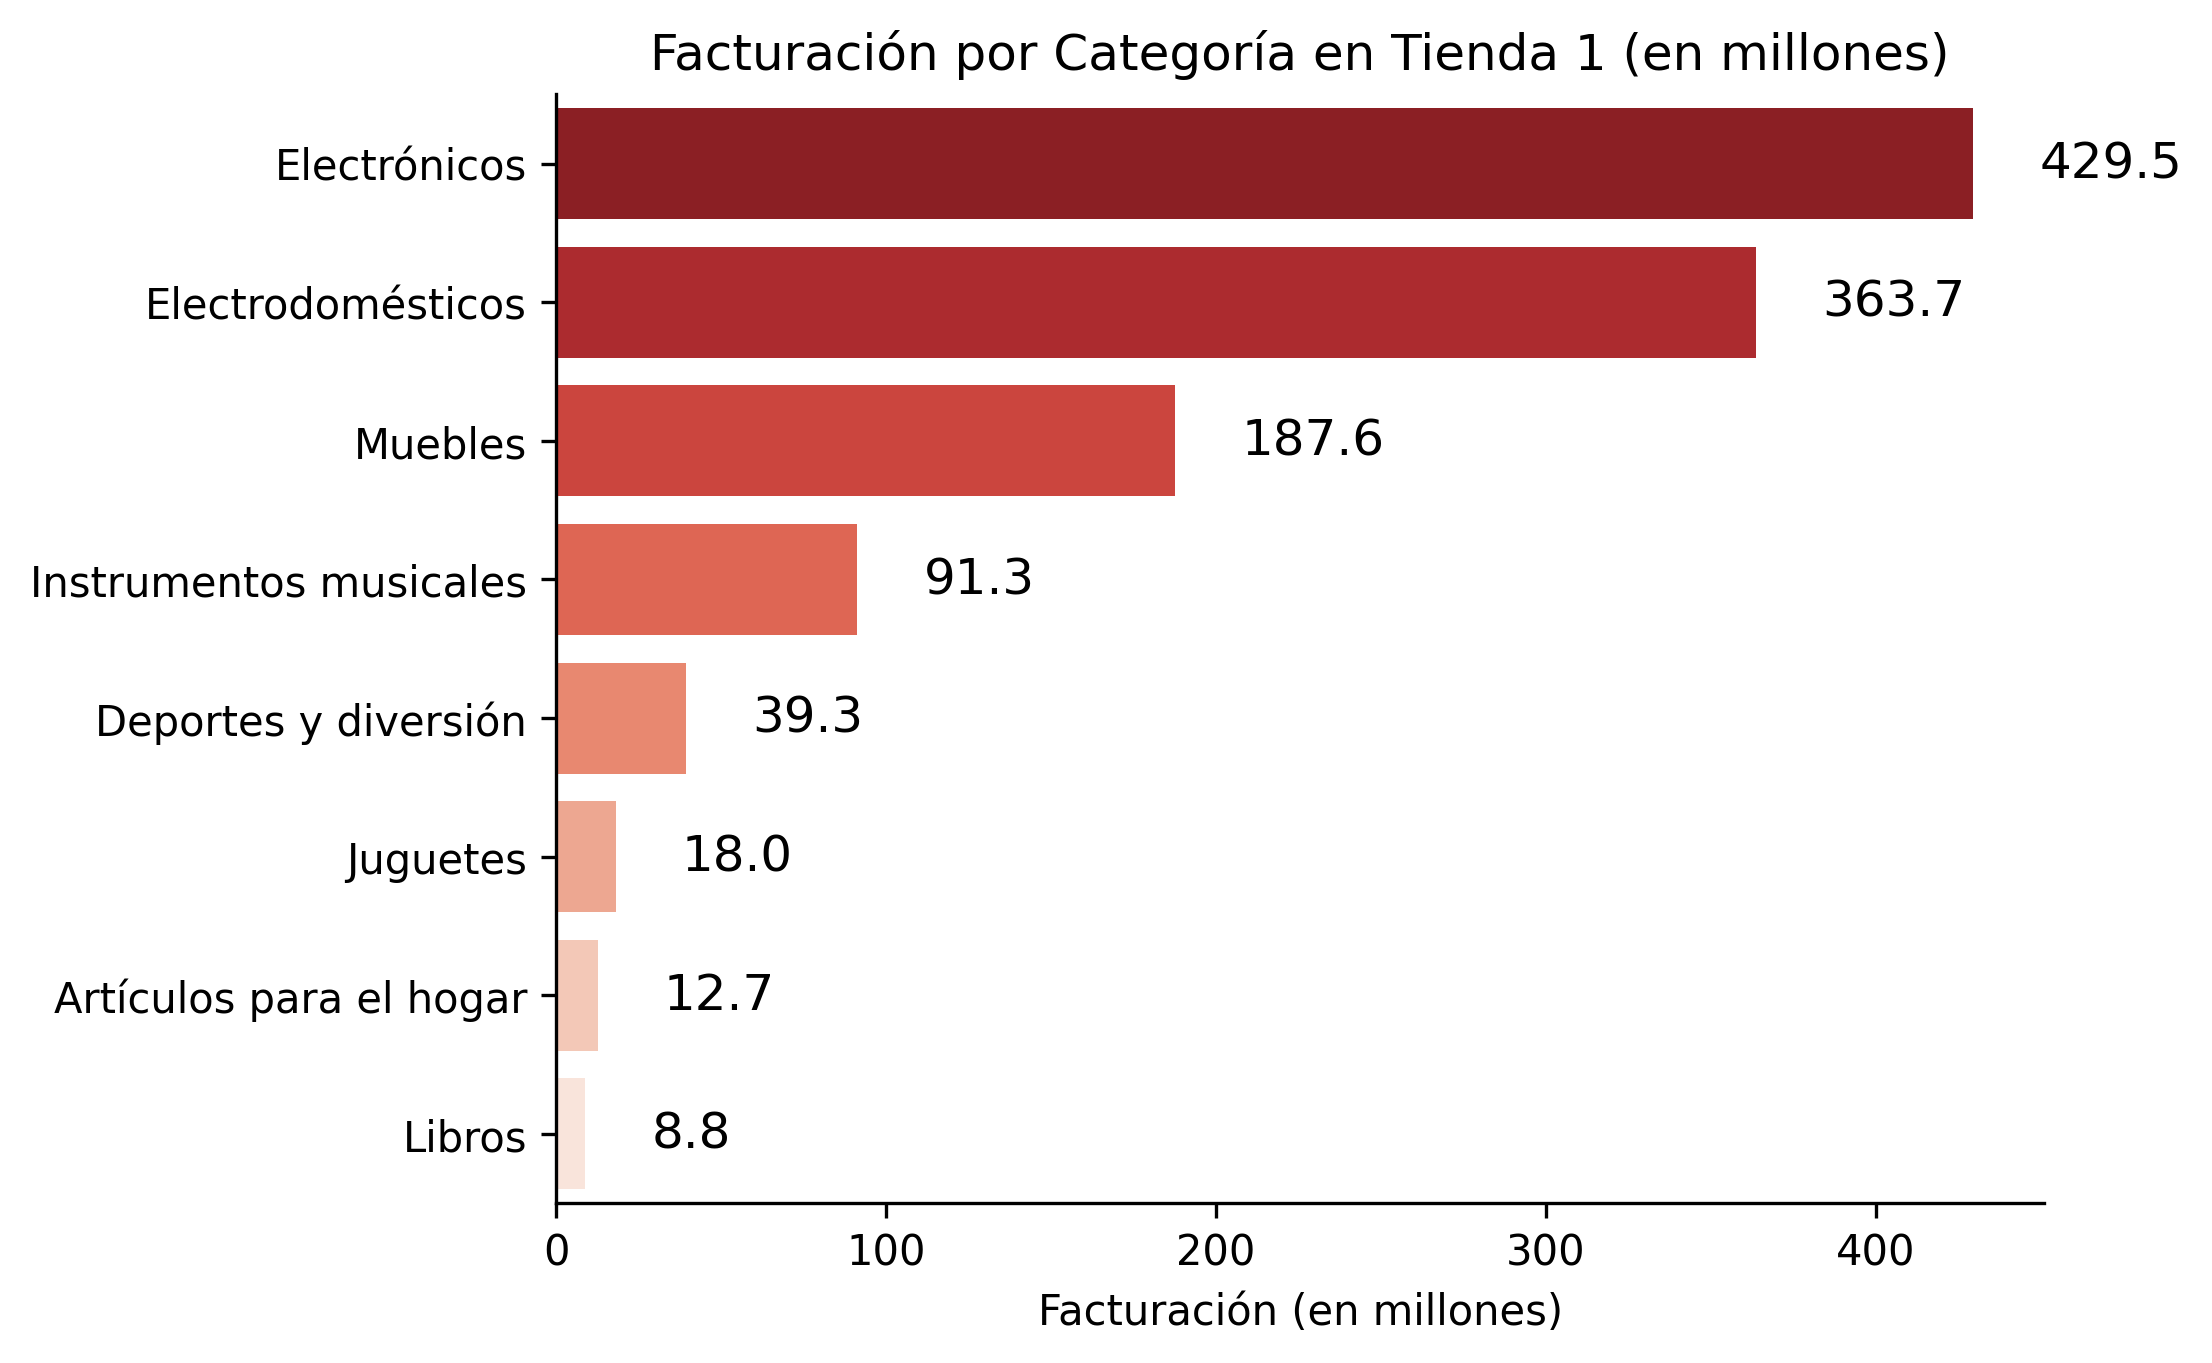

In [44]:
display(Image(filename='/content/barplot_facturacion_por_categoria_Tienda 1.png'))

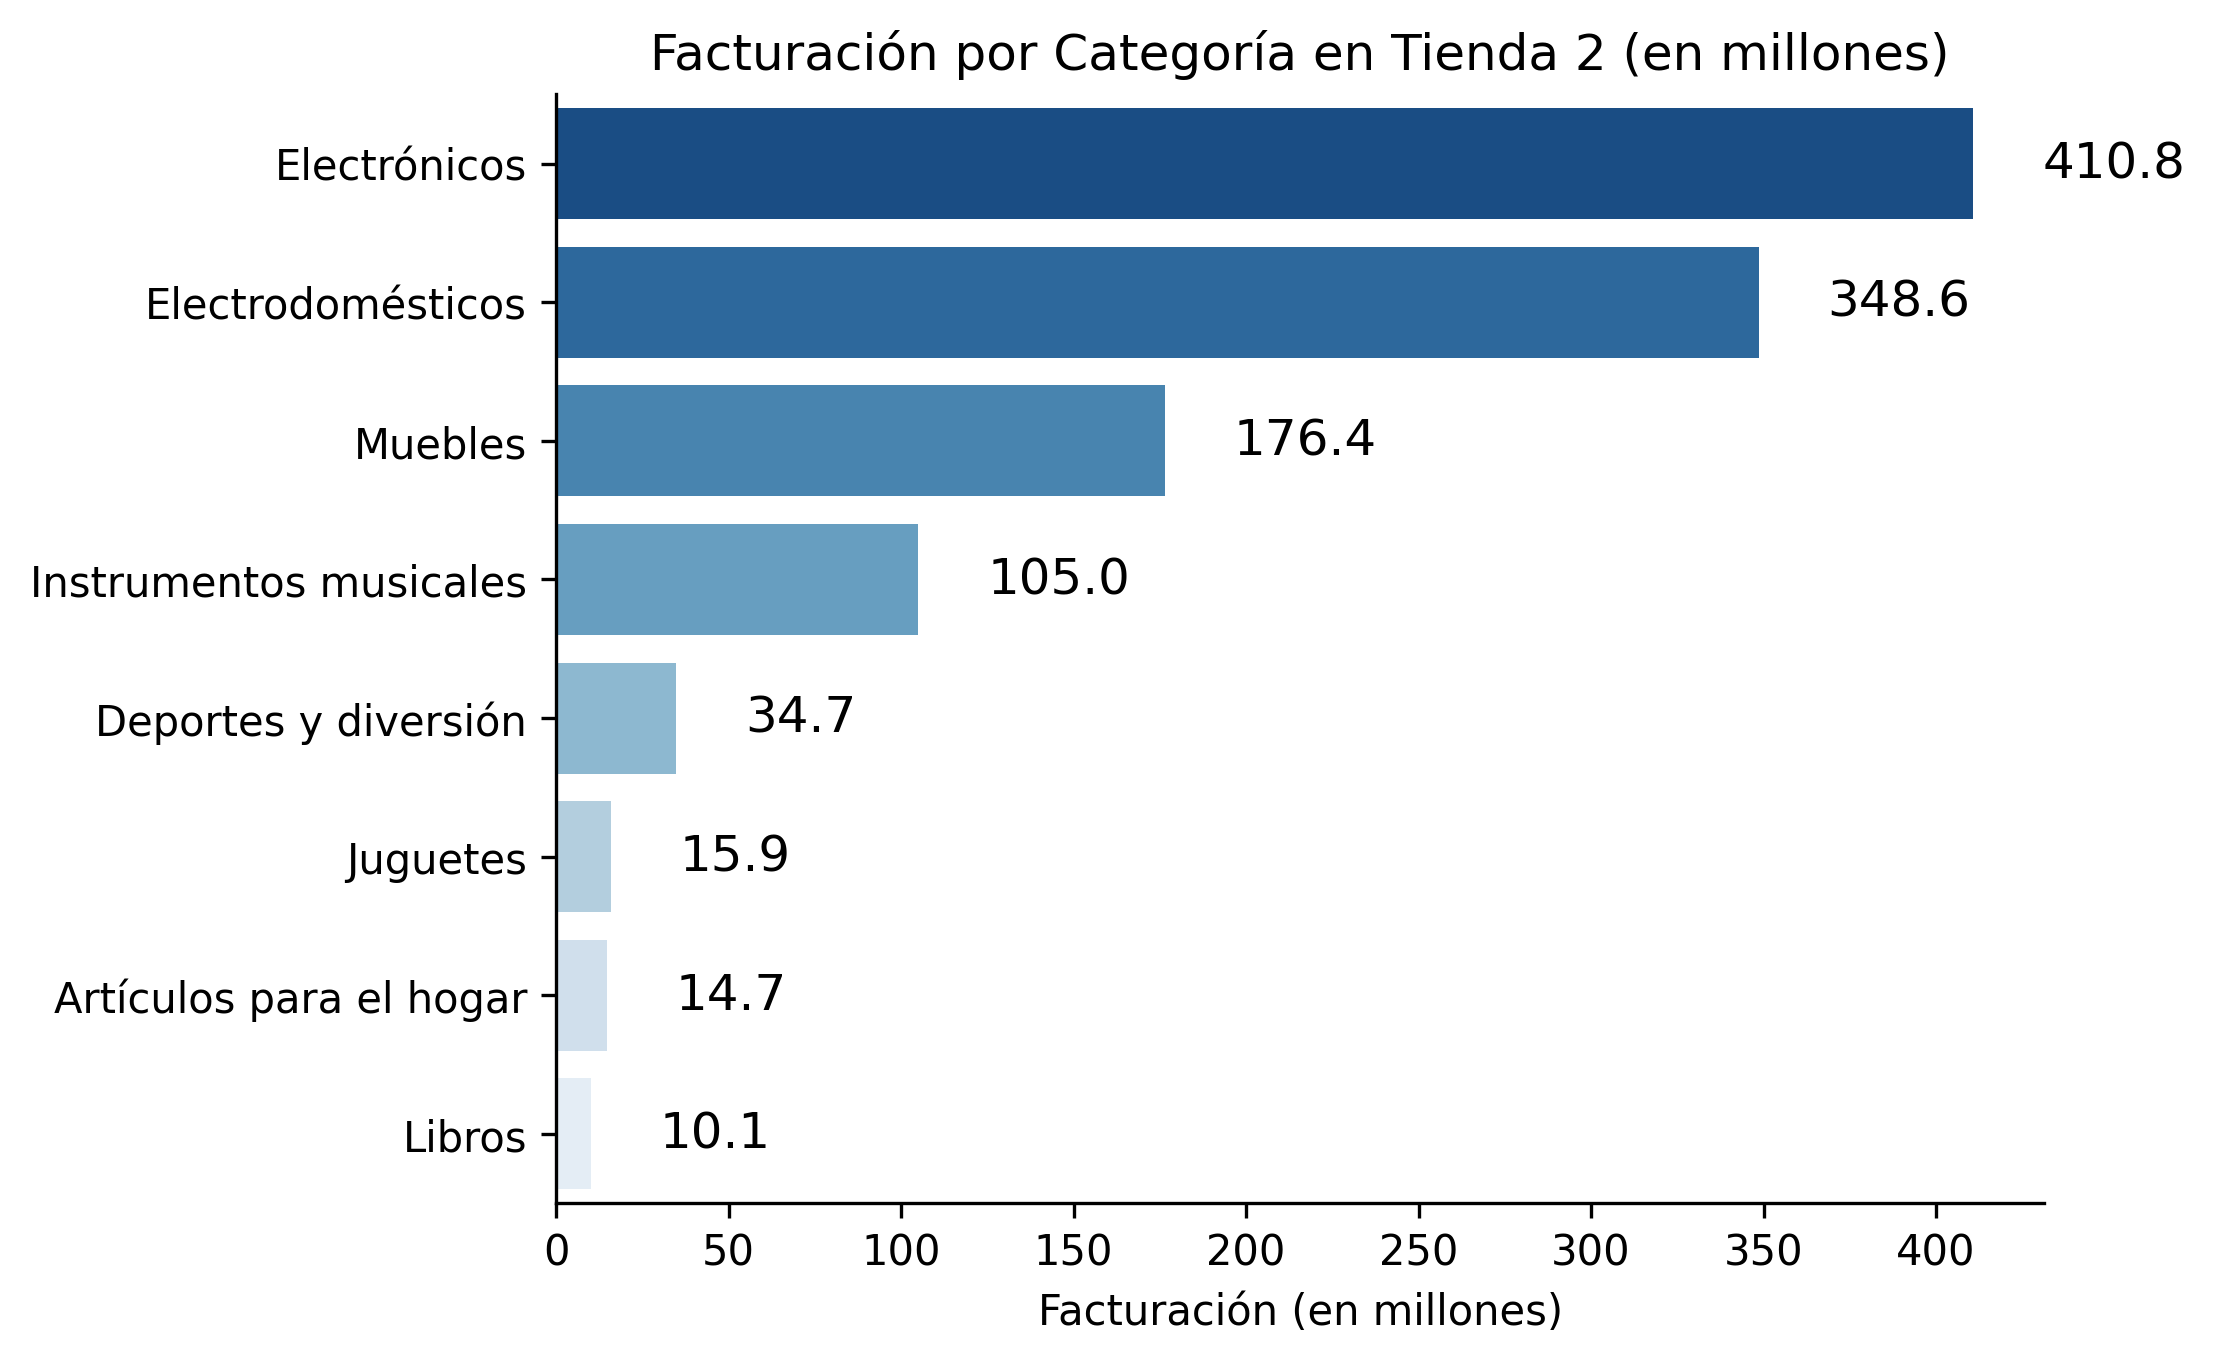

In [45]:
display(Image(filename='/content/barplot_facturacion_por_categoria_Tienda 2.png'))

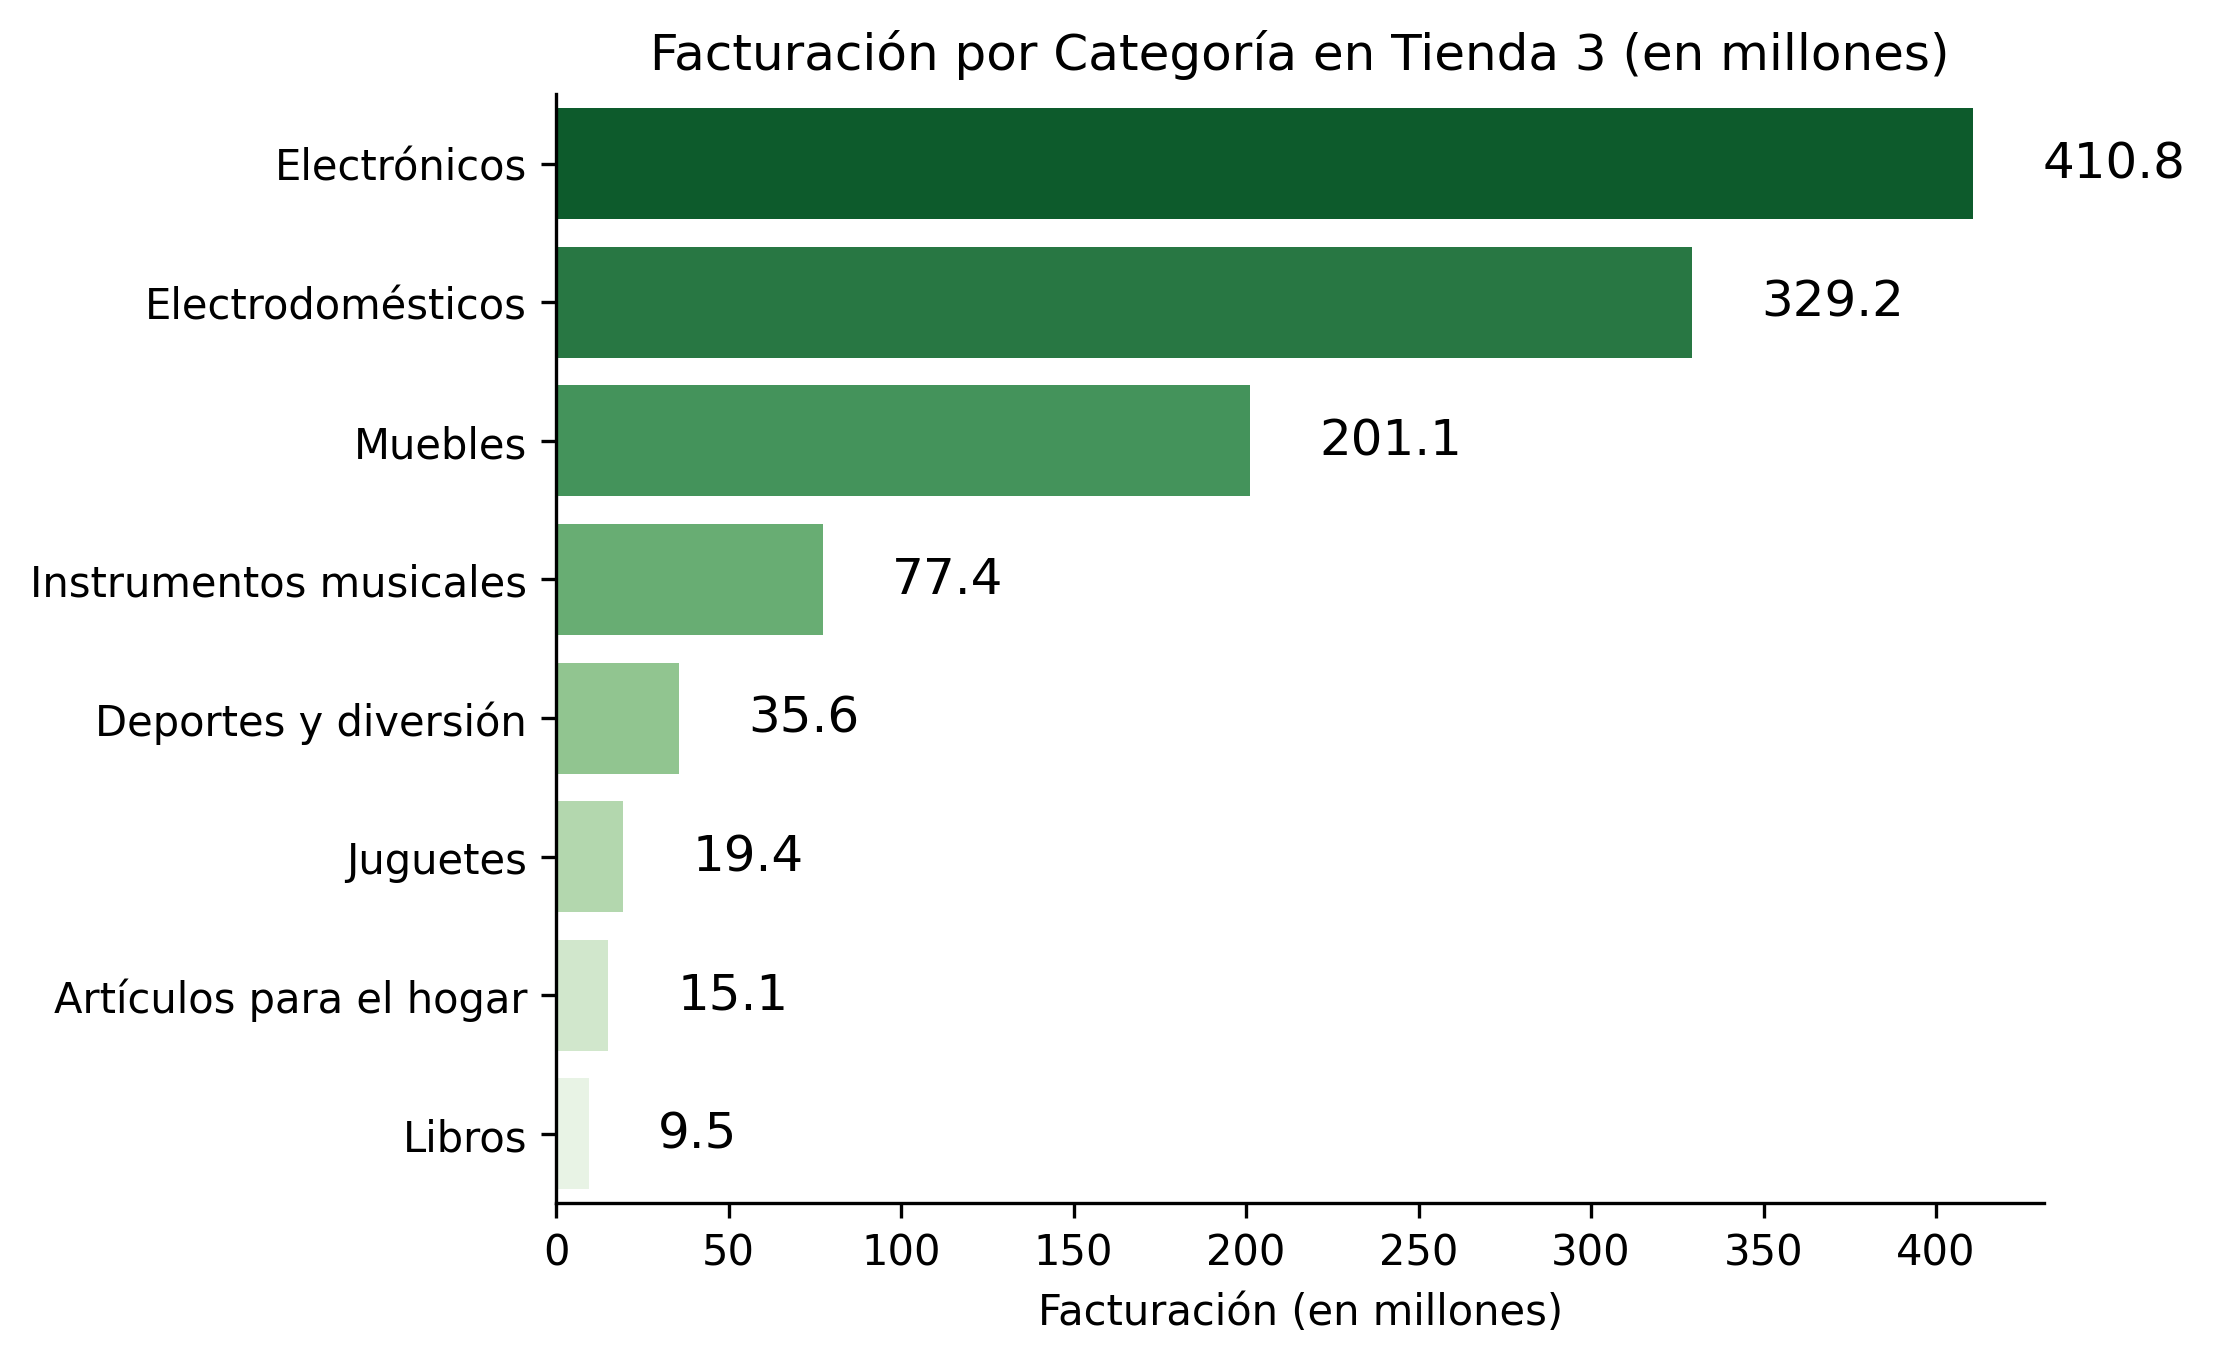

In [46]:
display(Image(filename='/content/barplot_facturacion_por_categoria_Tienda 3.png'))

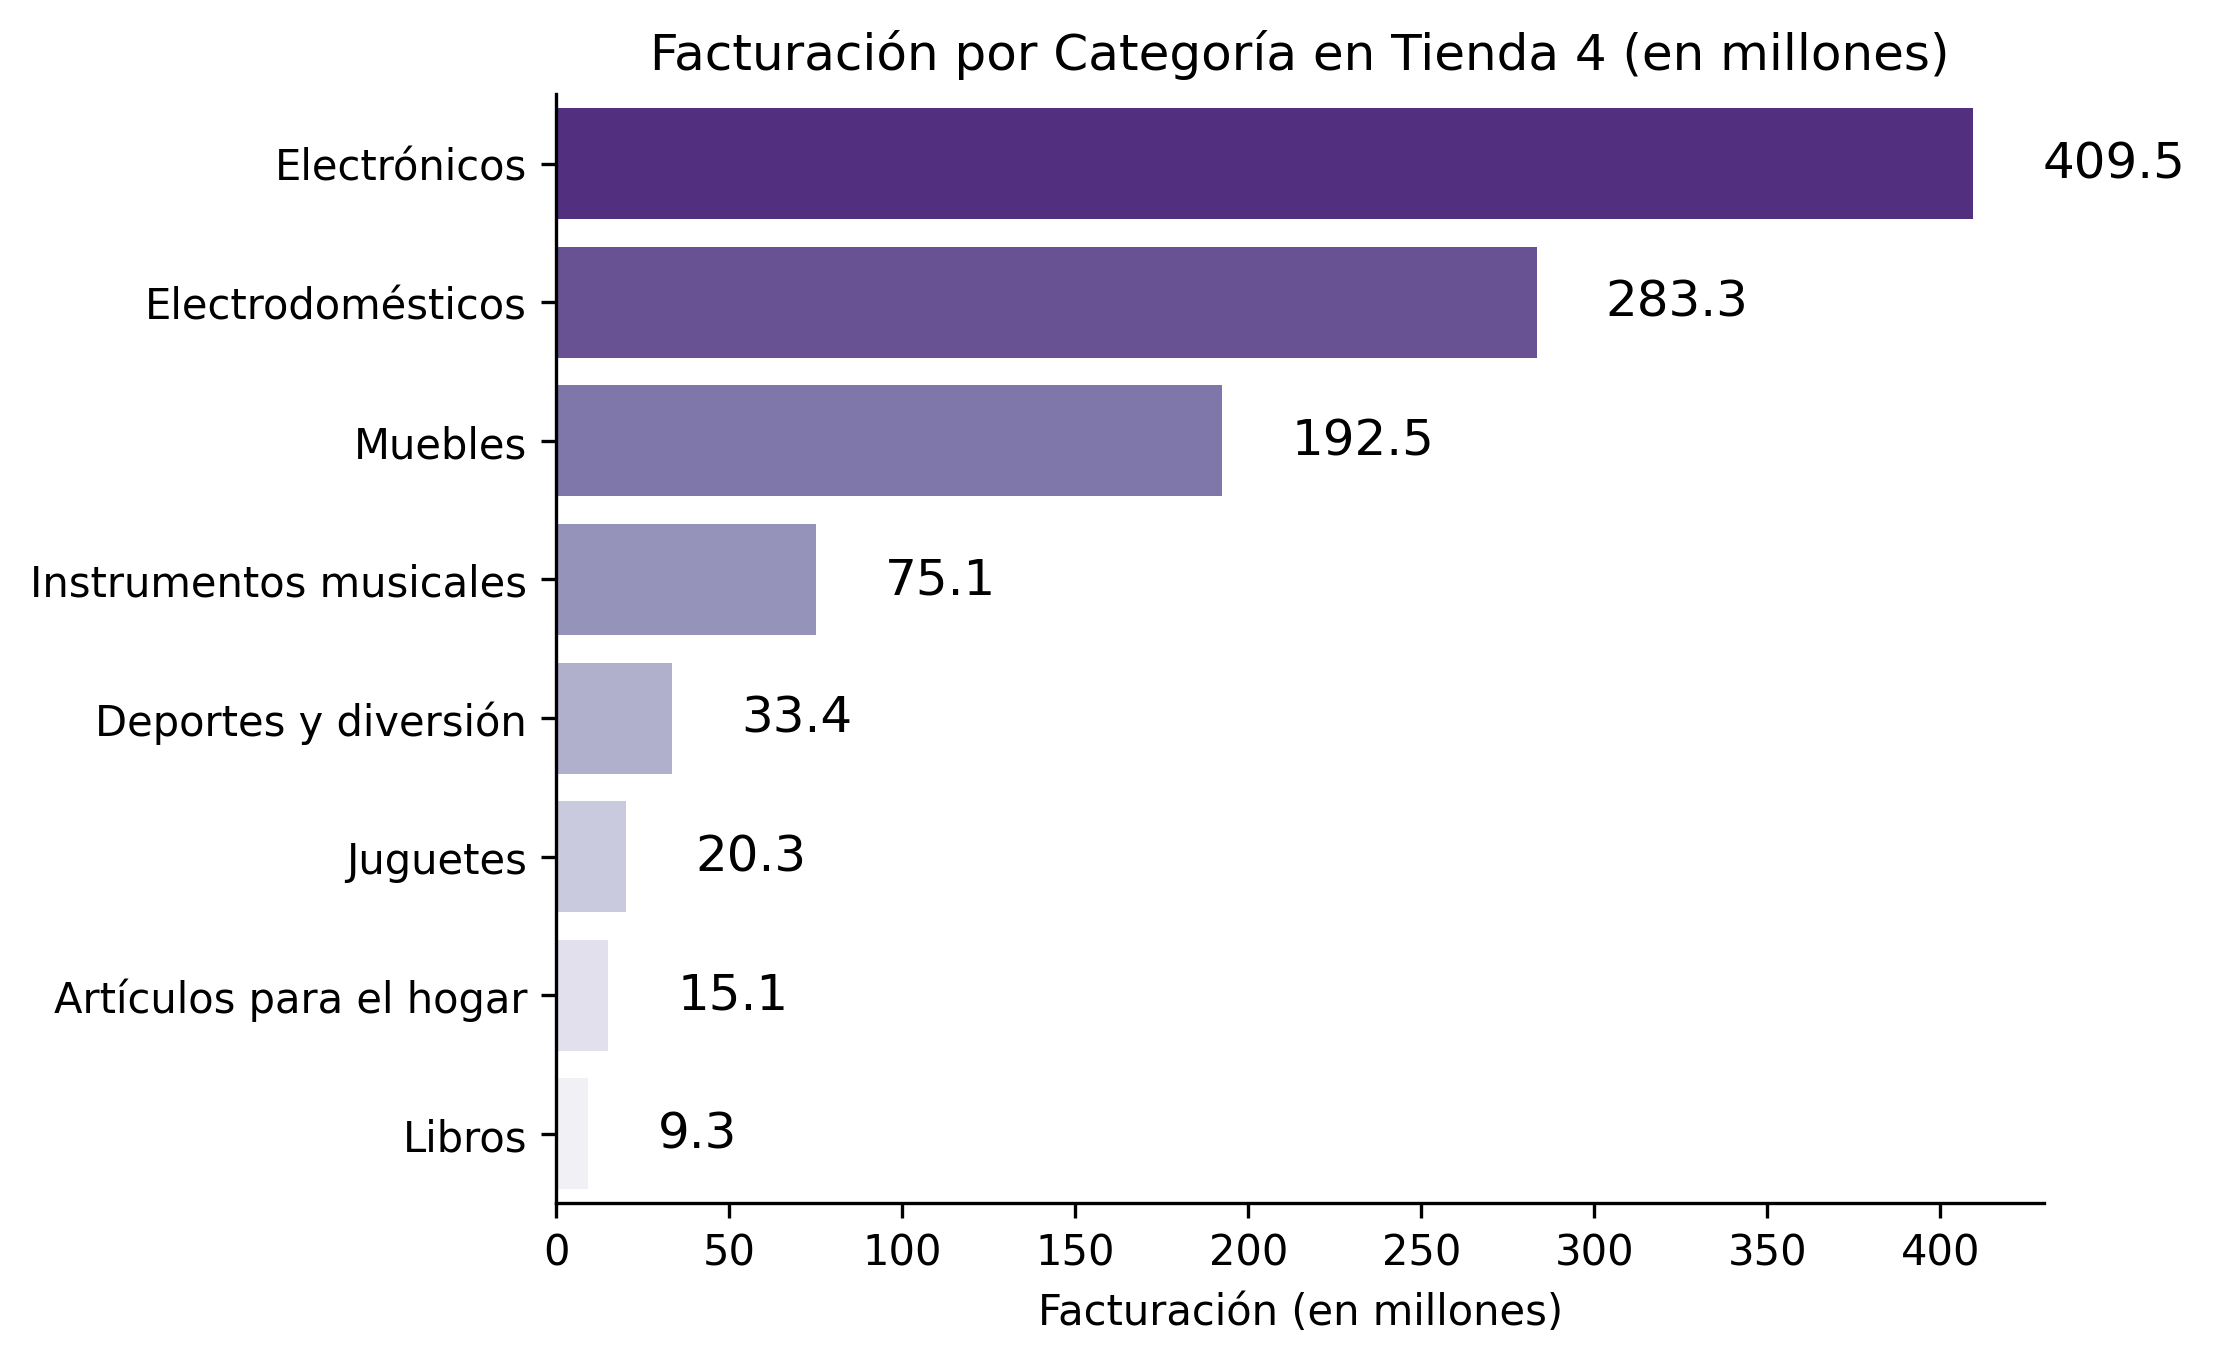

In [47]:
display(Image(filename='/content/barplot_facturacion_por_categoria_Tienda 4.png'))

**En estos gráficos tampoco se ve una diferencia significativa en el patrón de facturación por categoría entre las cuatro tiendas.**

## **Análisis de la Calificación Promedio de cada tienda**

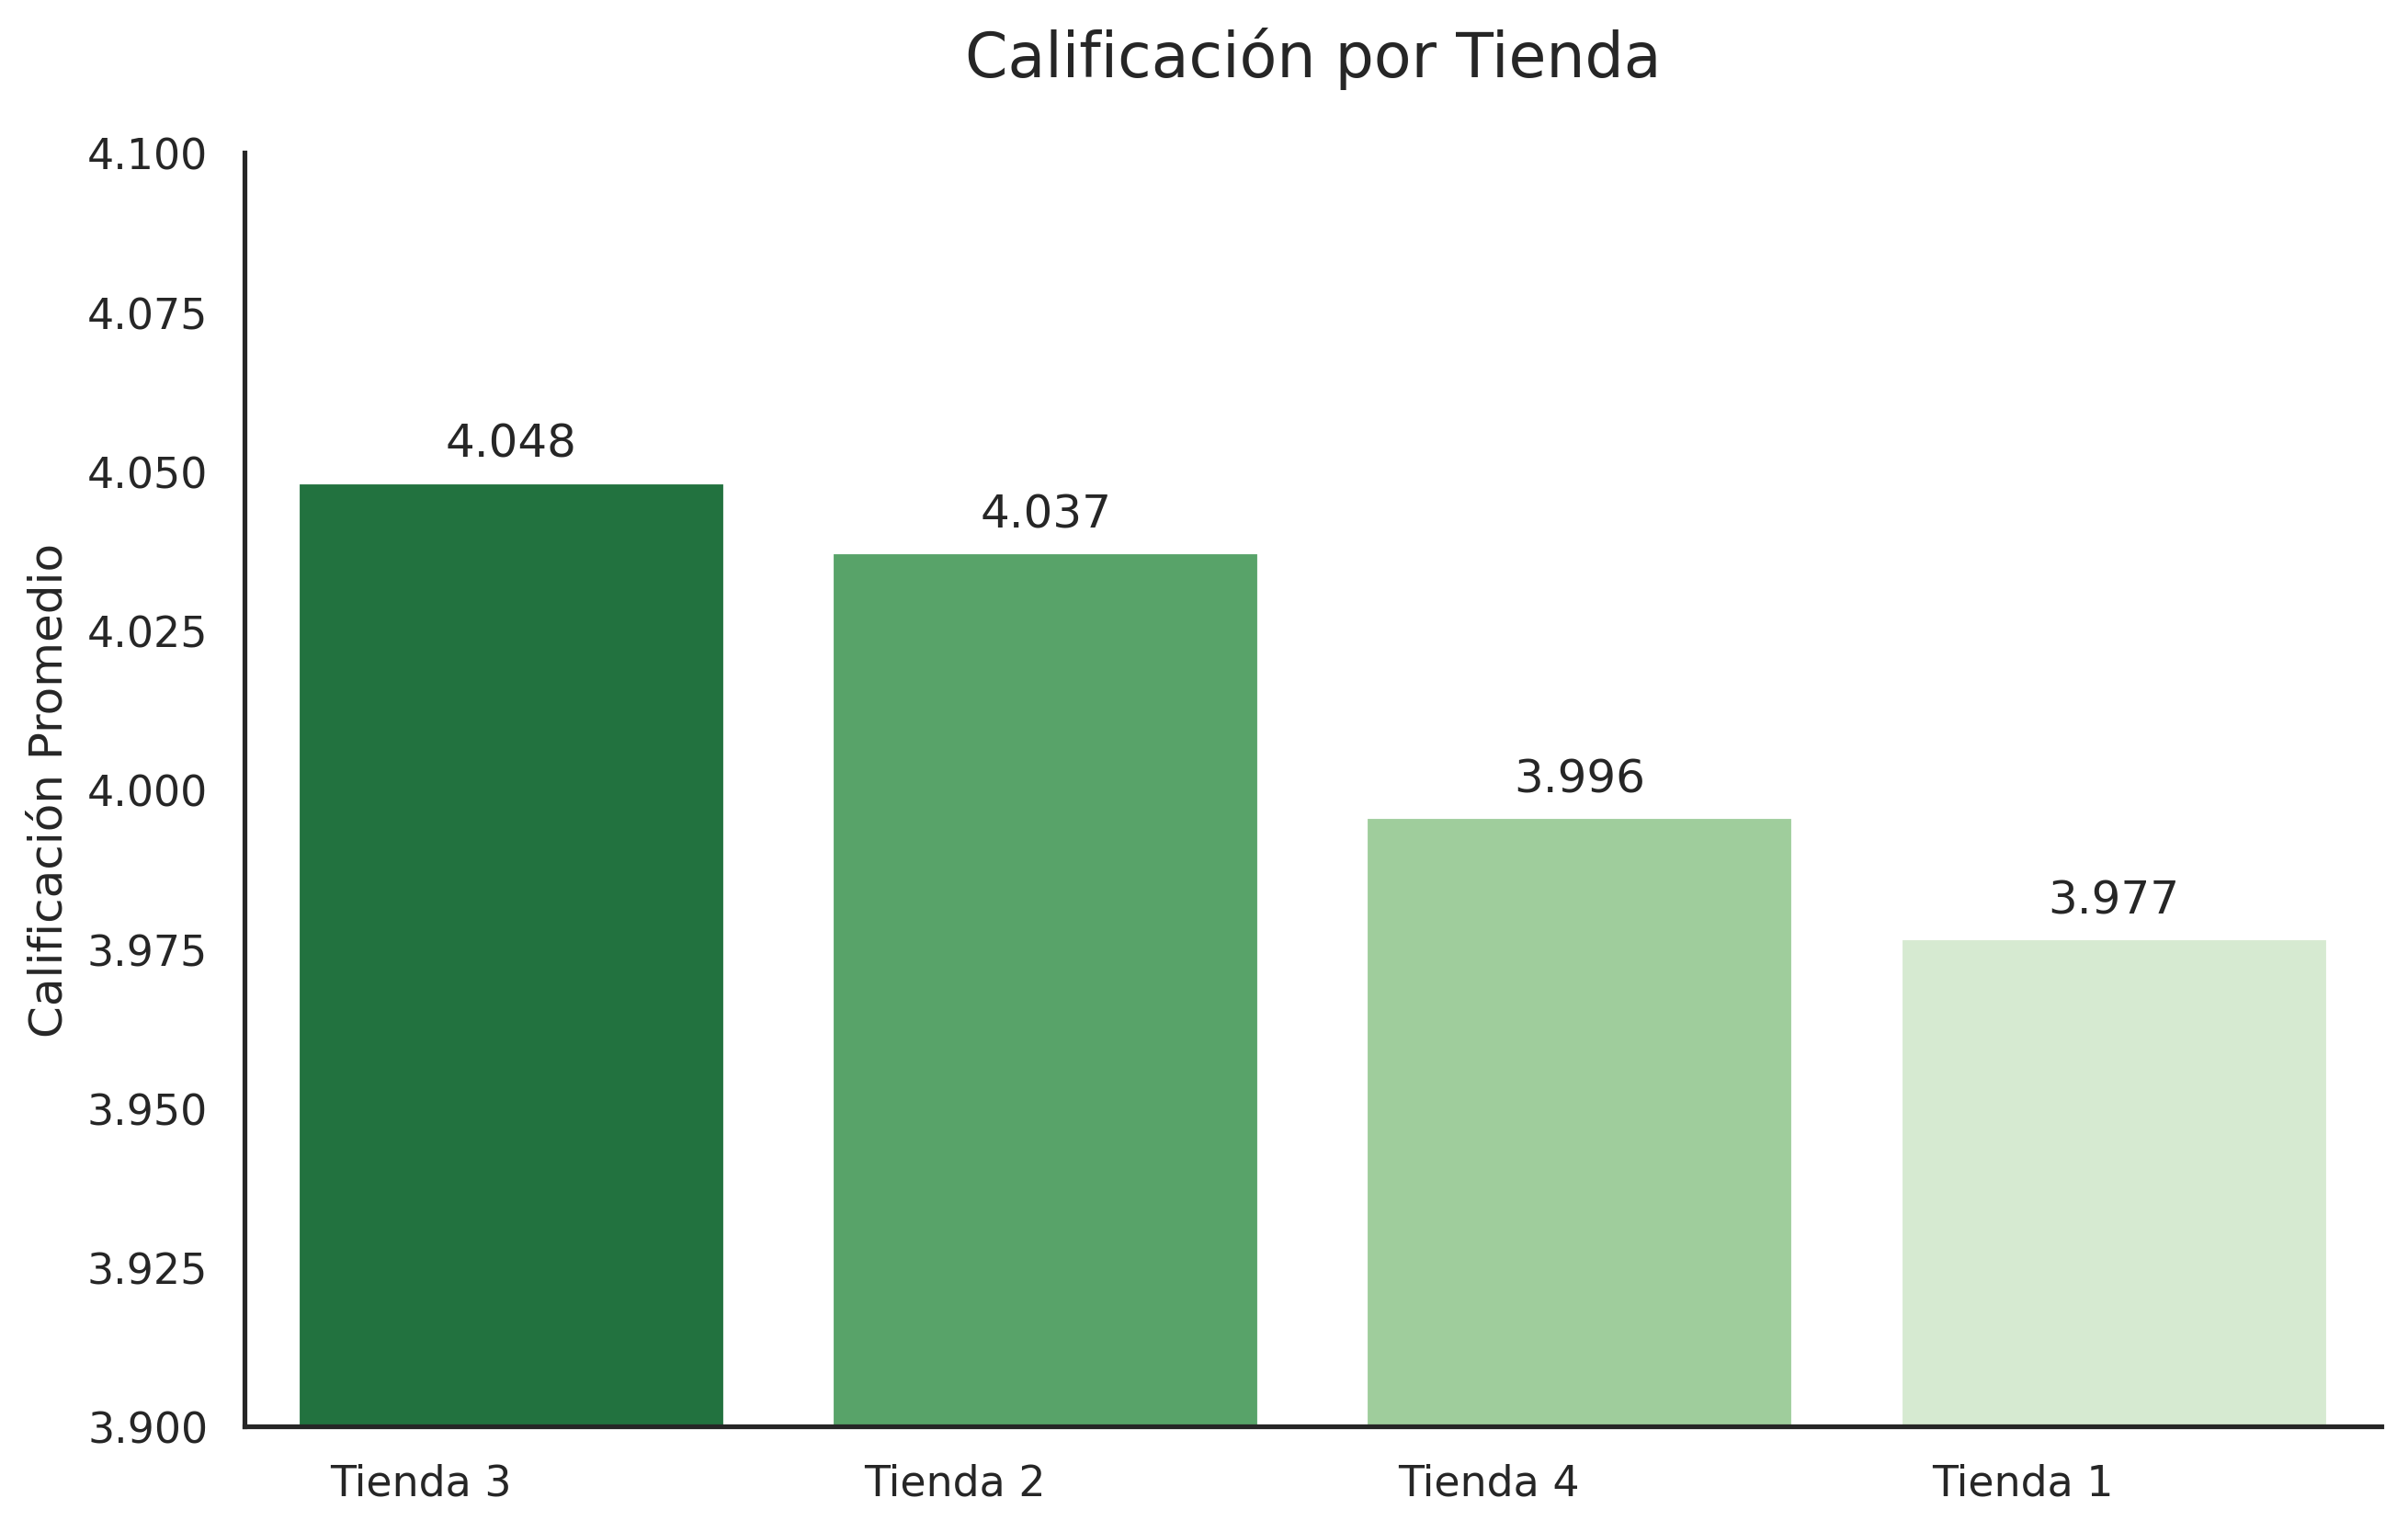

In [48]:
display(Image(filename='/content/barplot_calificacion_x_tienda.png'))

En el gráfico presendente se aprecia que la mejor calificación la tiene la **Tienda 3**, y la peor la **Tienda 1**

Si asignamos un puntaje a las tiendas según su clasificación podemos tener:

**Tienda 3**: 4 puntos

**Tienda 2**: 3 puntos

**Tienda 4**: 2 puntos

**Tienda 1**: 1 punto

Y tendríamos un puntaje acumulado:

**Tienda 1**: 5 puntos

**Tienda 2**: 6 puntos

**Tienda 3**: 6 puntos

**Tienda 4**: 3 puntos

## **Productos más y menos vendidos por tienda**

**Se presenta a conitnuación un gráfico con la información de productos más y menos vendidos por tienda**

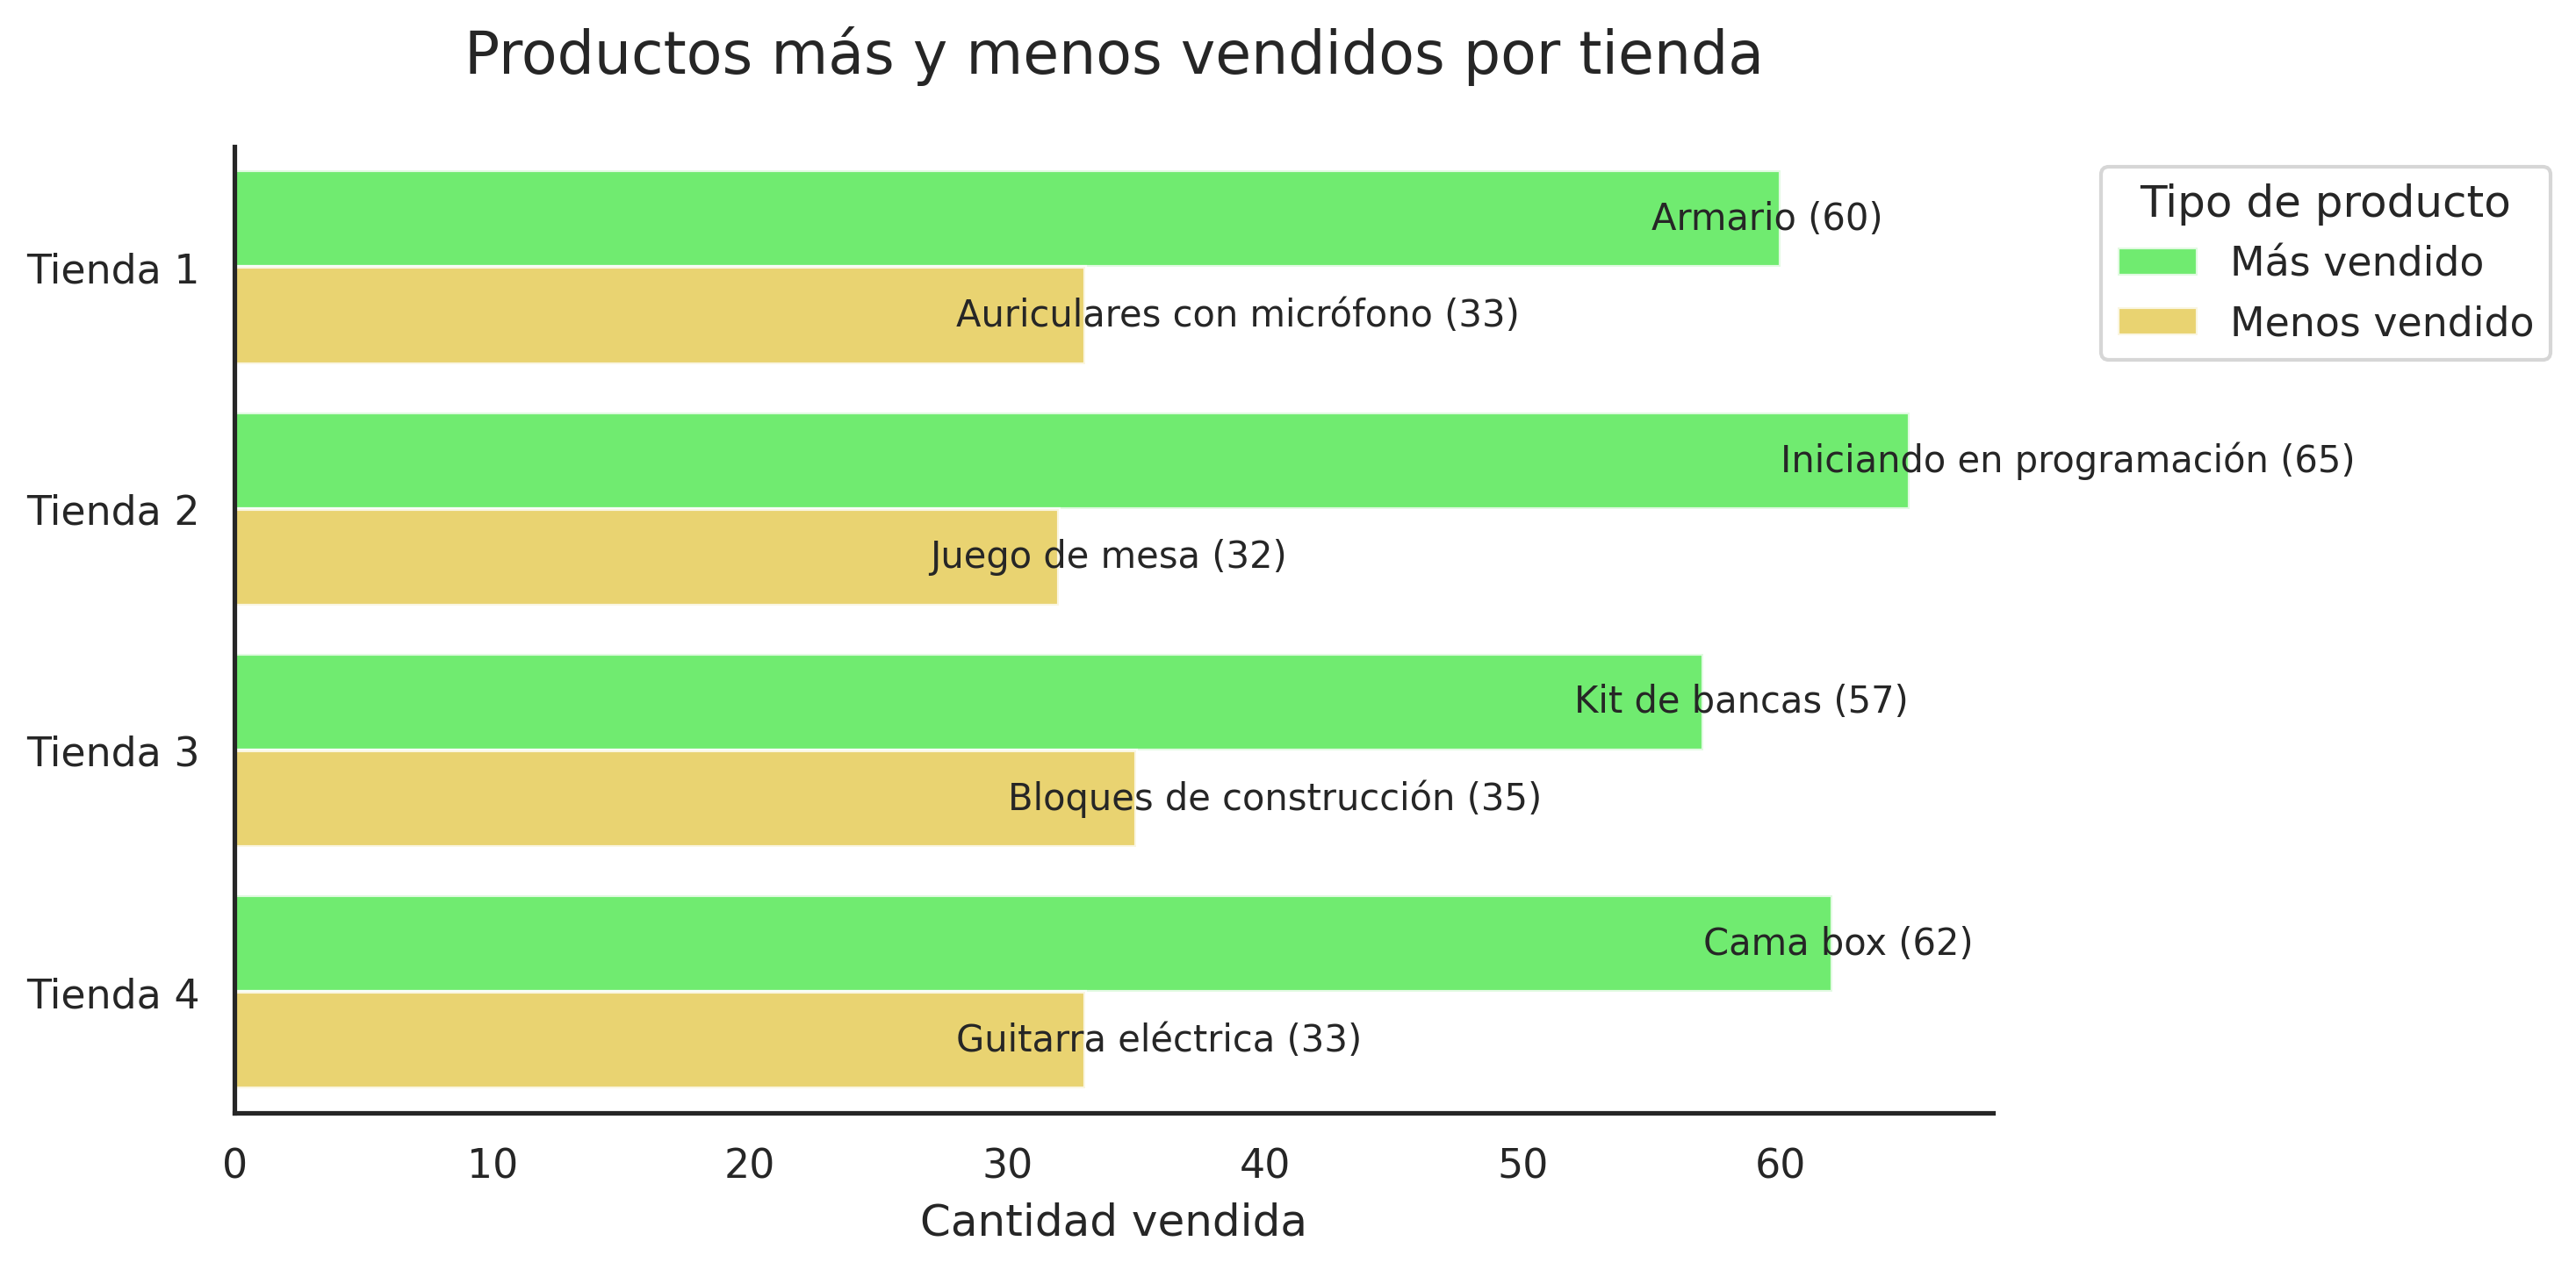

In [49]:
display(Image(filename='/content/barplot_productos_mas_menos_vendidos_x_tienda.png'))

**Este gráfico no aporta información relevante para calificar el desempleño de las tiendas**

## **Análisis del Costo Promedio de Envío por tienda**

**Se presenta a continuación un gráfico comparativo de los costos promedio de envío de las cuatro tiendas**

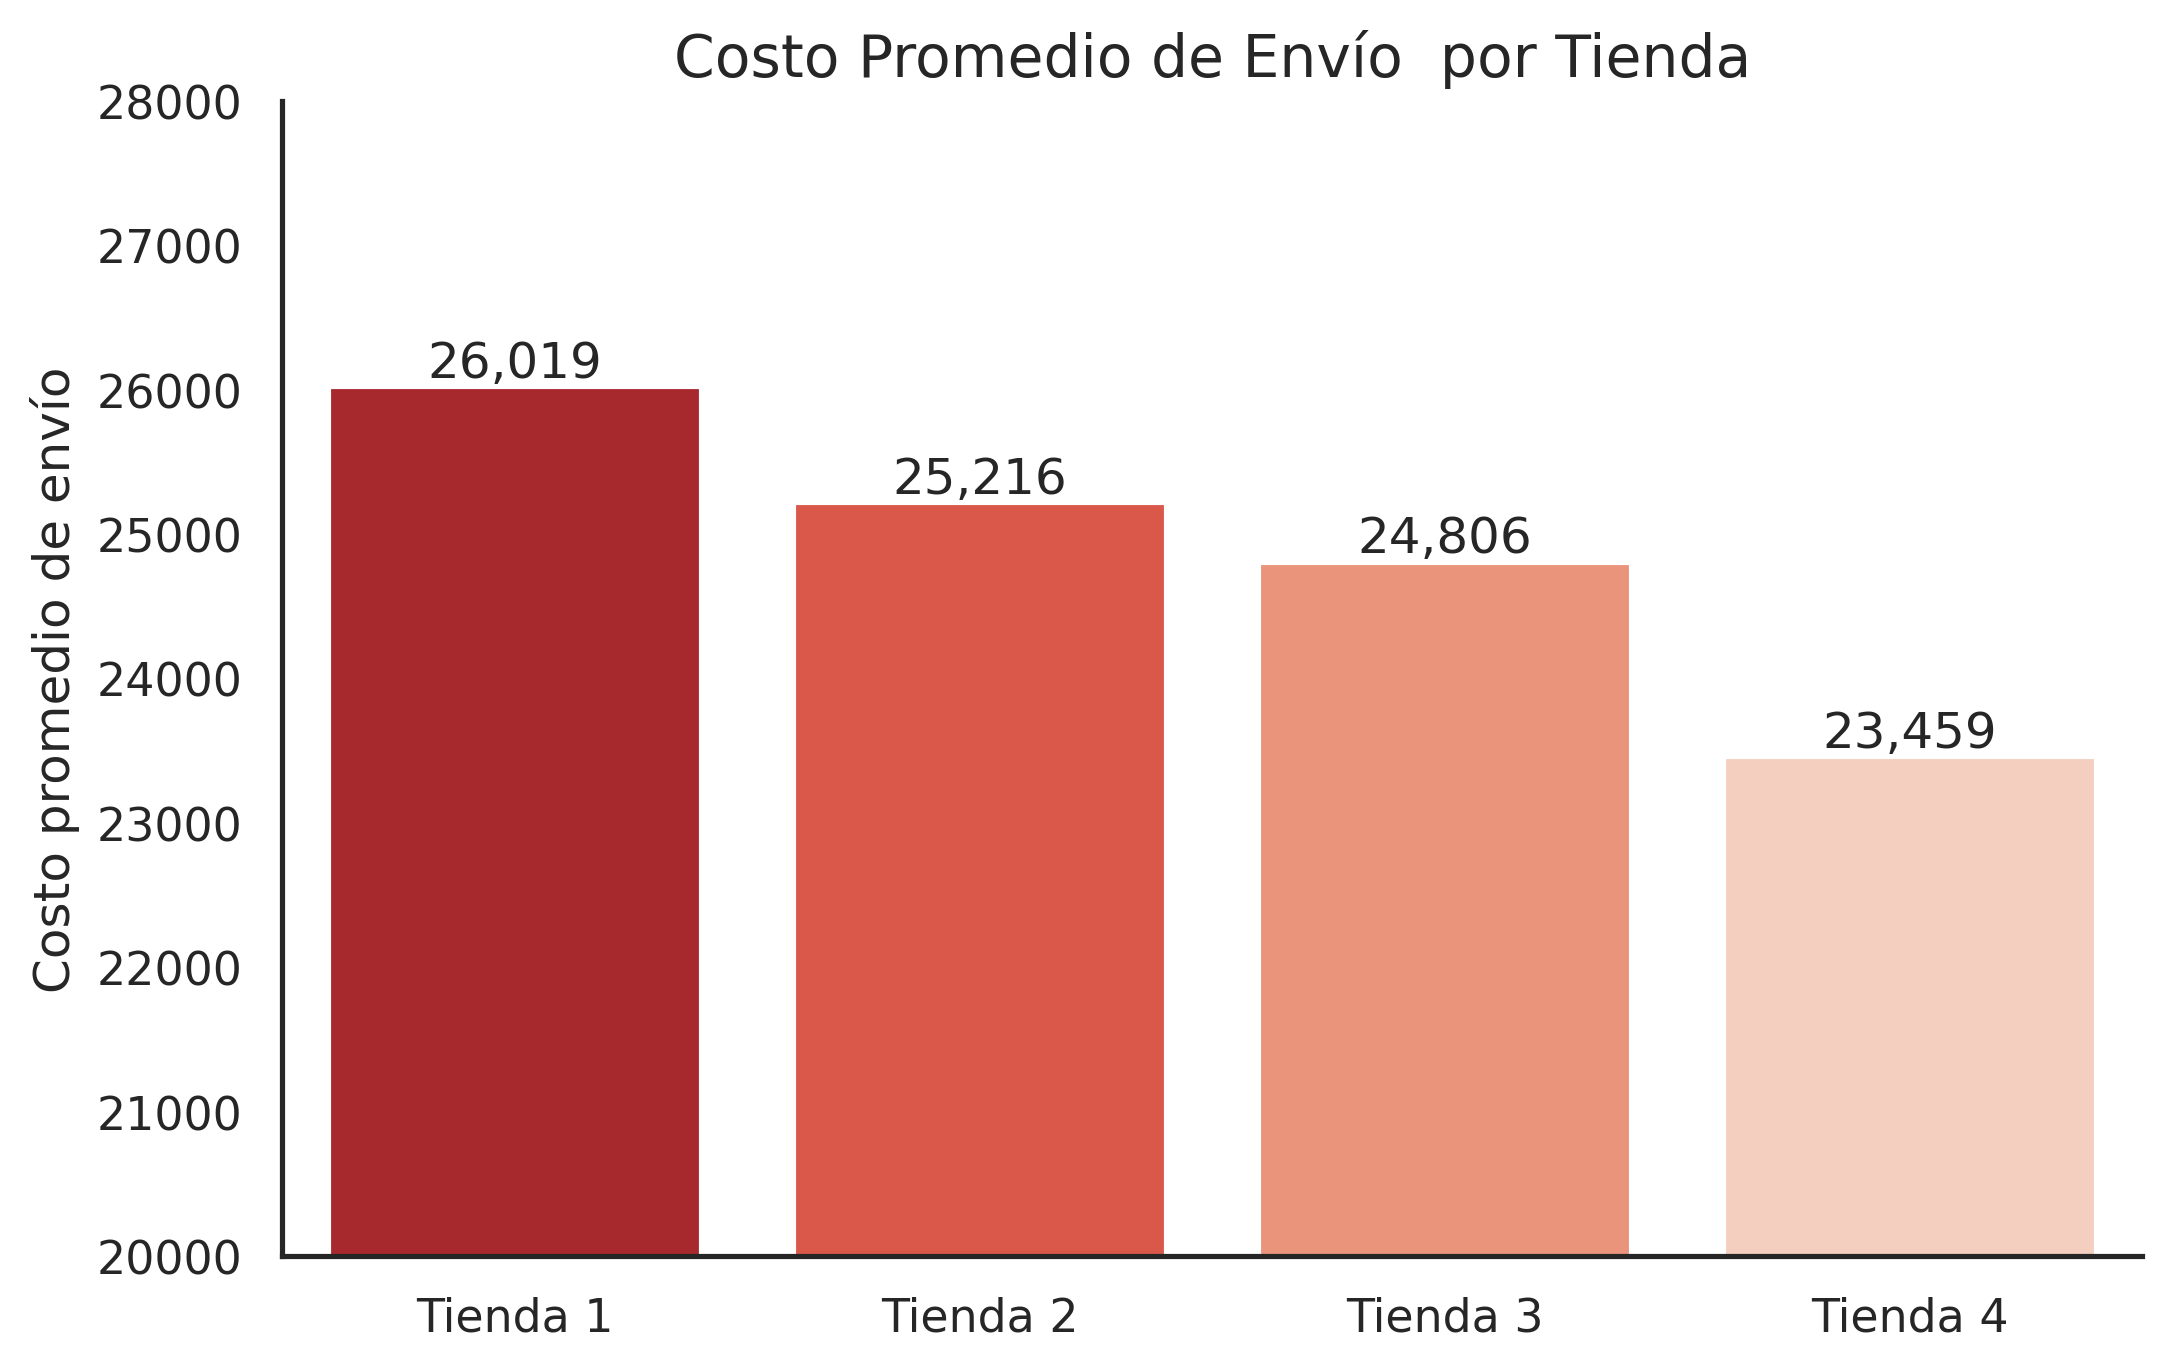

In [50]:
display(Image(filename='/content/barplot_costo_promedio_envio_x_tienda.png'))

**Aunque se aprecia diferencia en el Promedio del Costo de Envío por tienda, es necesario averiguar si eso afecta a la facturación en alguna proporciónn equivalente**

**Es interesante mirar cúanto represeta el Costo Total de Envío como porcentaje de la Facturación Total de cada tienda**

**Eso lo vemos en el siguiente gráfico**

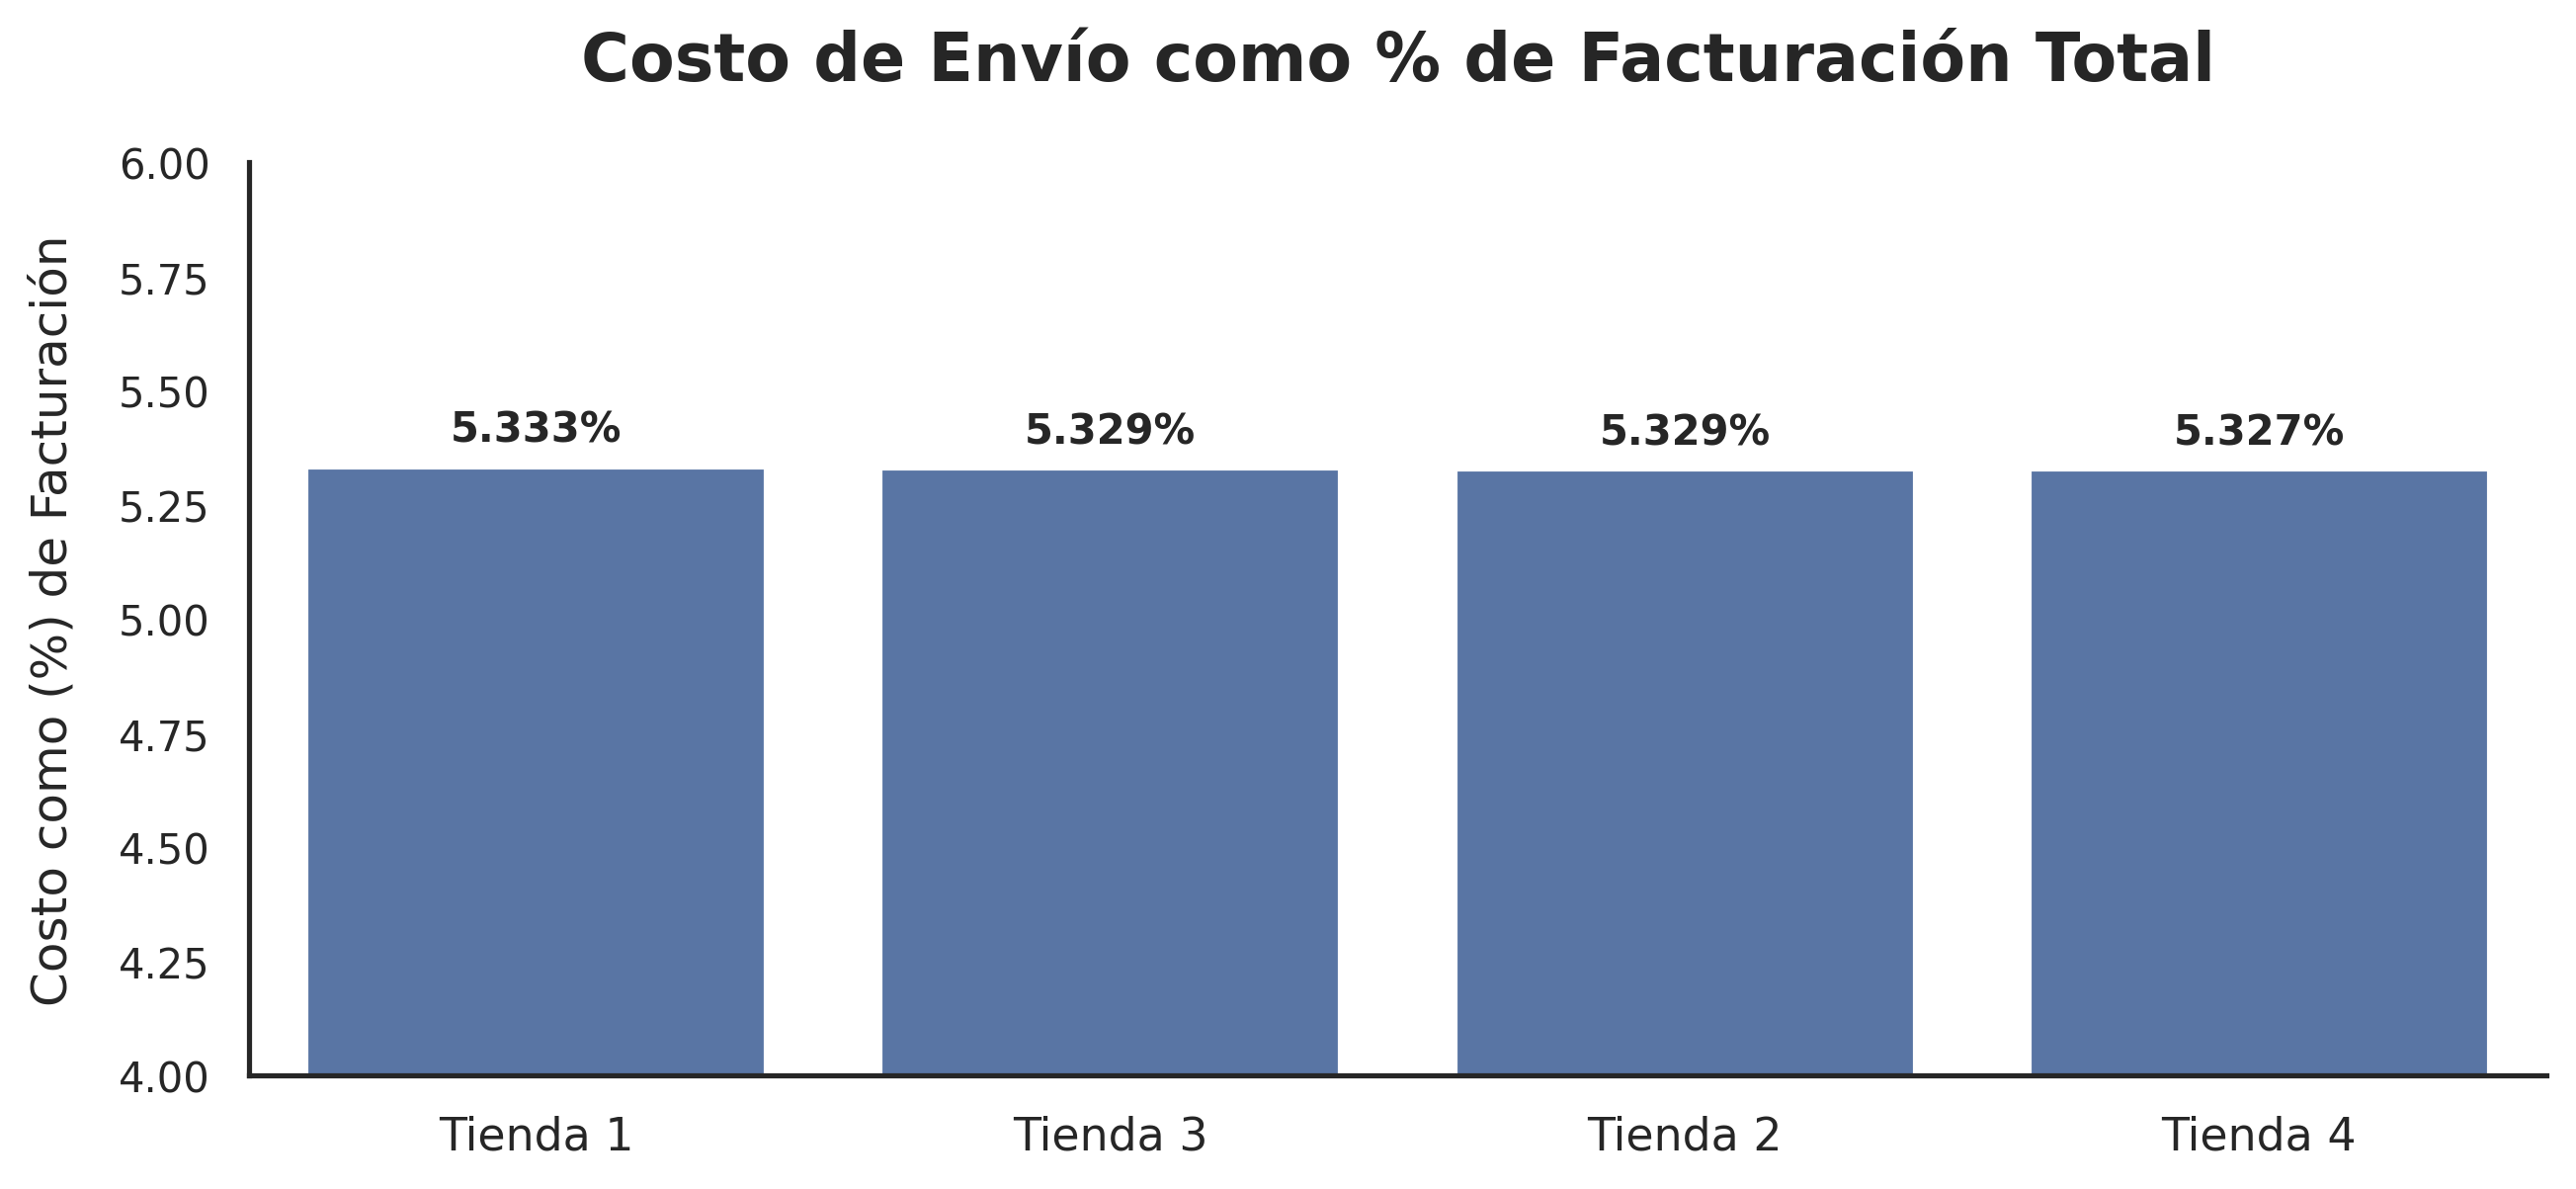

In [51]:
display(Image(filename='/content/barplot_costo_envio_como_porct_fact.png'))

**En este gráfico podemos ver que el Costo Total de Envíos, como porcentaje de la Facturación Total en cada tienda es prácticamente el mismo 5,33% (si lo redondeamos al segundo decimal)**

**Por lo tanto, el Costo de Envío no es un dato que permita hacer una diferencia apreciable en el rendimiento de las cuatro tiendas.**

## **Análisis comparativo de la facturación a través del tiempo**

**El seguiente gráfico presenta la facturación trimestral de las cuatro tiendas en el periodo estudiado**

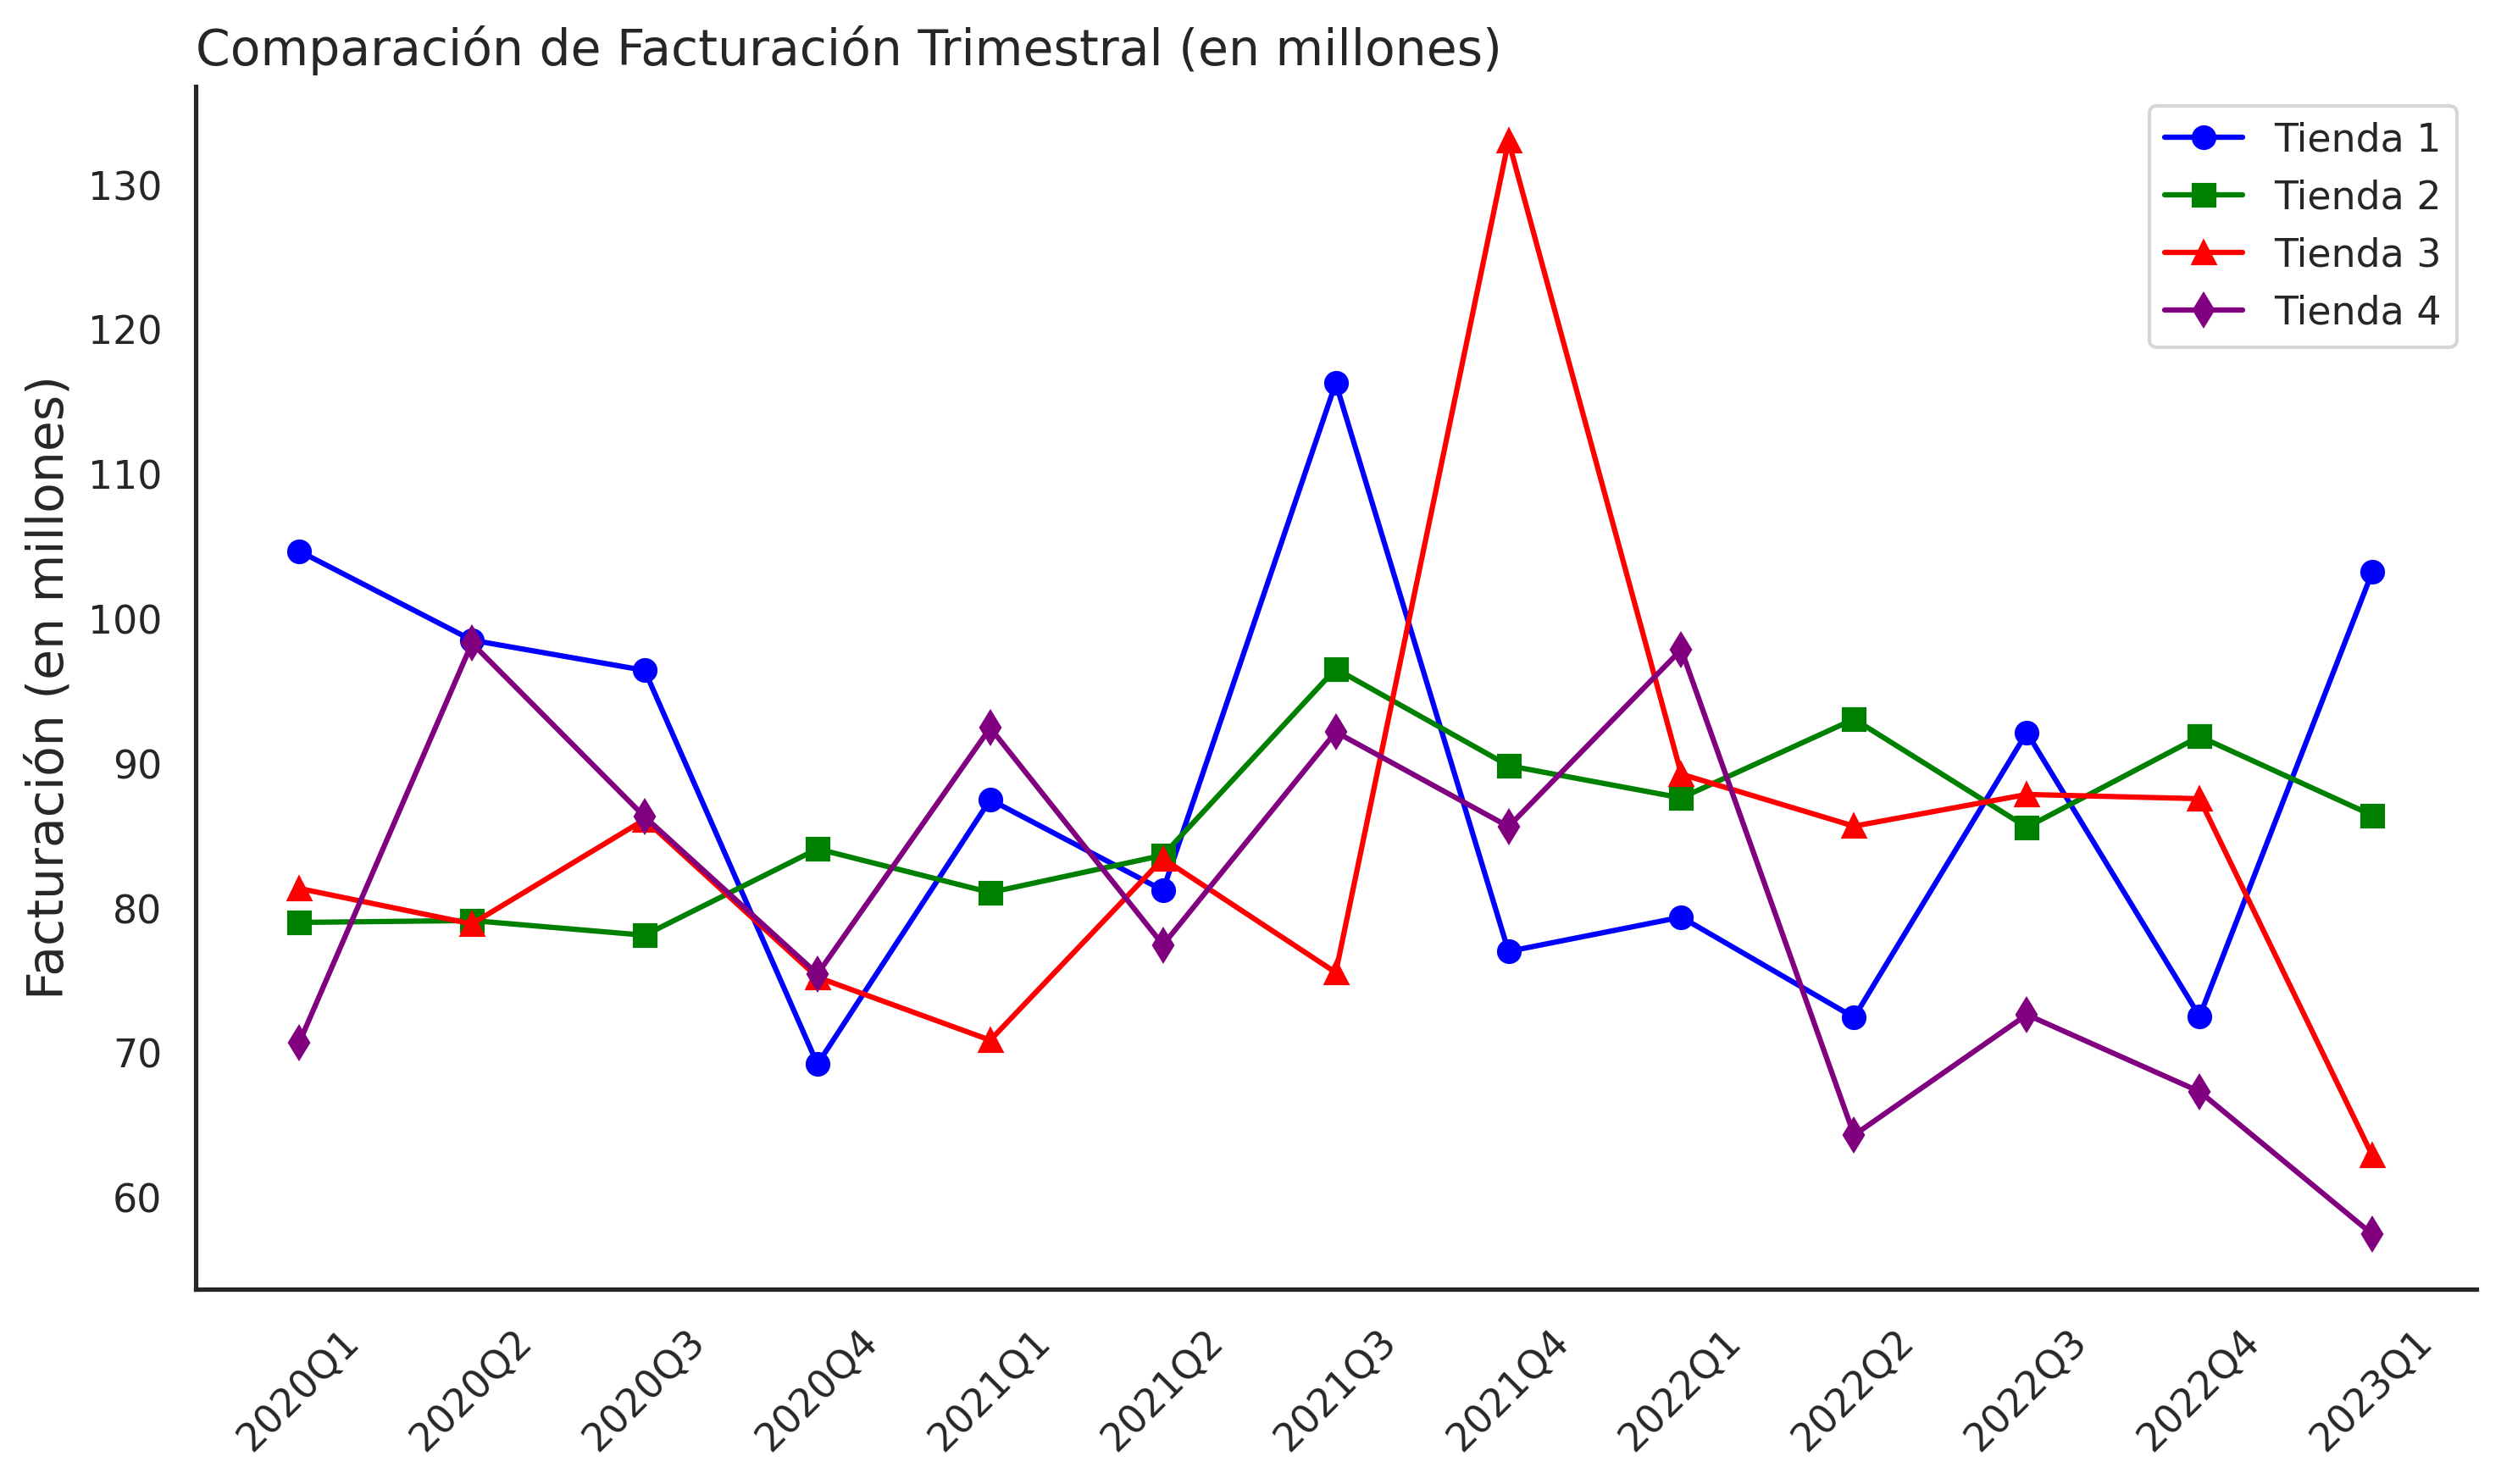

In [52]:
display(Image(filename='/content/lineplot_facturacion_x_trimestre.png'))

**En este gráfico se puede ver que las tiendas 3 y 4 han tenido una baja en la facturación en los últimos trimestres**

**Pero es la Tienda 4 la que ha tenido la baja más significativa en el último año**

Si asignamos un puntaje por regularidad en la facturación trimestral podríamos tener:

**Tienda 2**: 4 puntos

**Tienda 1**: 3 puntos

**Tienda 3**: 2 puntos

**Tienda 4**: 1 punto

**Con esto tenemos el siguiente puntaje acumulado final por tienda:**

**Tienda 1**: 8 puntos

**Tienda 2**: 10 puntos

**Tienda 3**: 8 puntos

**Tienda 4**: 5 puntos


##**CONCLUSIÓN**

En función del análisis de los datos en el periodo estudiado, **se recomienda vender la Tienda 4**, ya que tiene la menor calificación en los aspectos evaluados.